In [1]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *
from venn import venn

HGNC, ENSID2Entrez, GeneSymbol2Entrez, Entrez2Symbol, allen_mouse_genes = LoadGeneINFO()
ExpMat, ExpZscoreMat, ExpMatNorm, ExpZscoreMatNorm = LoadExpressionMatrices()
gnomad_cons = pd.read_csv("../dat/genes/gnomad.v2.1.1.lof_metrics.by_gene.txt",
                          delimiter="\t", index_col="gene")

In [4]:
graph = LoadConnectome2()
graph_local = LoadConnectome2("../dat/allen-mouse-conn/adj_mat_cartesian_local.csv")
graph_distal = LoadConnectome2("../dat/allen-mouse-conn/adj_mat_cartesian_distal.csv")
EdgeWeightsDict = EdgeDict(graph)
topNs = np.arange(200, 10, -10)

In [6]:
def LoadBiasvsCoheFil(fil):
    fin = open(fil, 'rt')
    l1 = fin.readline().strip().split("\t")
    l2 = fin.readline().strip().split("\t")
    l2 = [int(x) for x in l2]
    l3 = fin.readline().strip().split("\t")
    l3 = [float(x) for x in l3]
    l4 = fin.readline().strip().split("\t")
    l4 = [float(x) for x in l4]
    return l1, l2, l3, l4

#l1,l2,l3,l4 = LoadBiasvsCoheFil("dat/BiasRankCohe/ASD.EW.pLI.z2.rankcohe.txt")
#STR_Ranks = pd.read_csv("dat/bias2/ASD.159.pLI.z2.csv", index_col="STR").index.values
#ASD_STR_Ranks = l1
#asd_topN_cohe = []
#asd_topN_cohe_local = []
#asd_topN_cohe_distal = []
#for topN in topNs:
#    top_strs = STR_Ranks[:topN]
#    asd_topN_cohe.append(ScoreSTRSet(graph, top_strs, EdgeWeightsDict)[0])
#    asd_topN_cohe_local.append(ScoreSTRSet(graph_local, top_strs, EdgeWeightsDict)[0])
#    asd_topN_cohe_distal.append(ScoreSTRSet(graph_distal, top_strs, EdgeWeightsDict)[0])
#print(asd_topN_cohe[-4])


def XXX(asd_topN_cohe, asd_topN_cohe_local, asd_topN_cohe_distal, 
        Profile, Profile_local, Profile_distal, Profile_Name):
    profile_avg = Profile.mean(axis=0)
    profile_err = Profile.std(axis=0)
    profile_local_avg = Profile_local.mean(axis=0)
    profile_local_err = Profile_local.std(axis=0)
    profile_distal_avg = Profile_distal.mean(axis=0)
    profile_distal_err = Profile_distal.std(axis=0)
    cohe_exp = np.array((np.array(topNs)/213))
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10), dpi=200)
    ax1.plot(topNs, asd_topN_cohe/cohe_exp ,color="blue", label="ASD All")
    ax1.errorbar(topNs, profile_avg/cohe_exp, color="blue", 
            yerr=profile_err/cohe_exp, ls="dashed", label="{} All".format(Profile_Name))

    ax1.plot(topNs+1, asd_topN_cohe_local/cohe_exp ,color="green", label="ASD Local")
    ax1.errorbar(topNs+1, profile_local_avg/cohe_exp, color="green", 
            yerr=profile_local_err/cohe_exp, ls="dashed", label="{} Local".format(Profile_Name))

    ax1.plot(topNs+2, asd_topN_cohe_distal/cohe_exp ,color="red", label="ASD Distal")
    ax1.errorbar(topNs+2, profile_distal_avg/cohe_exp, color="red", 
            yerr=profile_distal_err/cohe_exp, ls="dashed", label="{} Distal".format(Profile_Name))

    ax1.invert_xaxis()
    ax1.set_title("Top N vs Cohesivness")
    ax1.grid(True)
    ax1.legend()
    #cohe_exp = 4118

    idx = -4
    PlotPermutationP(Profile[:, idx]/cohe_exp[idx],asd_topN_cohe[idx]/cohe_exp[idx], ax2,
                     title="ASD vs {} (Complete)".format(Profile_Name), xlabel="cohesiveness", 
                     dist_label=Profile_Name, bar_label="ASD")
    PlotPermutationP(Profile_local[:, idx]/cohe_exp[idx],asd_topN_cohe_local[idx]/cohe_exp[idx], ax3, 
                     title="ASD vs {} (Local)".format(Profile_Name), xlabel="cohesiveness", 
                     dist_label=Profile_Name, bar_label="ASD")
    PlotPermutationP(Profile_distal[:, idx]/cohe_exp[idx],asd_topN_cohe_distal[idx]/cohe_exp[idx], ax4,
                     title="ASD vs {} (Distal)".format(Profile_Name), xlabel="cohesiveness", 
                     dist_label=Profile_Name, bar_label="ASD")
    

In [10]:
STR_Ranks = pd.read_csv("dat/bias2/ASD.EW.pLI.z2.csv", index_col="STR").index.values

asd_topN_cohe = []
asd_topN_cohe_local = []
asd_topN_cohe_distal = []
for topN in topNs:
    top_strs = STR_Ranks[:topN]
    asd_topN_cohe.append(ScoreSTRSet(graph, top_strs, EdgeWeightsDict,Weighted=True)[0])
    asd_topN_cohe_local.append(ScoreSTRSet(graph_local, top_strs, EdgeWeightsDict, Weighted=True)[0])
    asd_topN_cohe_distal.append(ScoreSTRSet(graph_distal, top_strs, EdgeWeightsDict, Weighted=True)[0])
print(asd_topN_cohe[-4])

0.361513943086262


In [17]:
print(topNs)
cont_dir = "dat/Control_GeneSet_Bias/Proband_Rand_Gene_withProb/"
Cont1_Cohesivness = []
Cont1_Cohesivness_local = []
Cont1_Cohesivness_distal = []
for i, file in enumerate(os.listdir(cont_dir)):
    if file.startswith("cont.genes"):
        continue
    df = pd.read_csv(cont_dir + file, index_col="STR")
    topN_cohe_all = []
    topN_cohe_local = []
    topN_cohe_distal = []
    for topN in topNs:
        top_strs = df.index.values[:topN]
        topN_cohe_all.append(ScoreSTRSet(graph, top_strs, {})[0])
        topN_cohe_local.append(ScoreSTRSet(graph_local, top_strs, {})[0])
        topN_cohe_distal.append(ScoreSTRSet(graph_distal, top_strs, {})[0])
    topN_cohe_all = np.array(topN_cohe_all)
    topN_cohe_local = np.array(topN_cohe_local)
    topN_cohe_distal = np.array(topN_cohe_distal)
    Cont1_Cohesivness.append(topN_cohe_all)
    Cont1_Cohesivness_local.append(topN_cohe_local)
    Cont1_Cohesivness_distal.append(topN_cohe_distal)
Cont1_Cohesivness = np.array(Cont1_Cohesivness)
Cont1_Cohesivness_local = np.array(Cont1_Cohesivness_local)
Cont1_Cohesivness_distal = np.array(Cont1_Cohesivness_distal)

[200 190 180 170 160 150 140 130 120 110 100  90  80  70  60  50  40  30
  20]


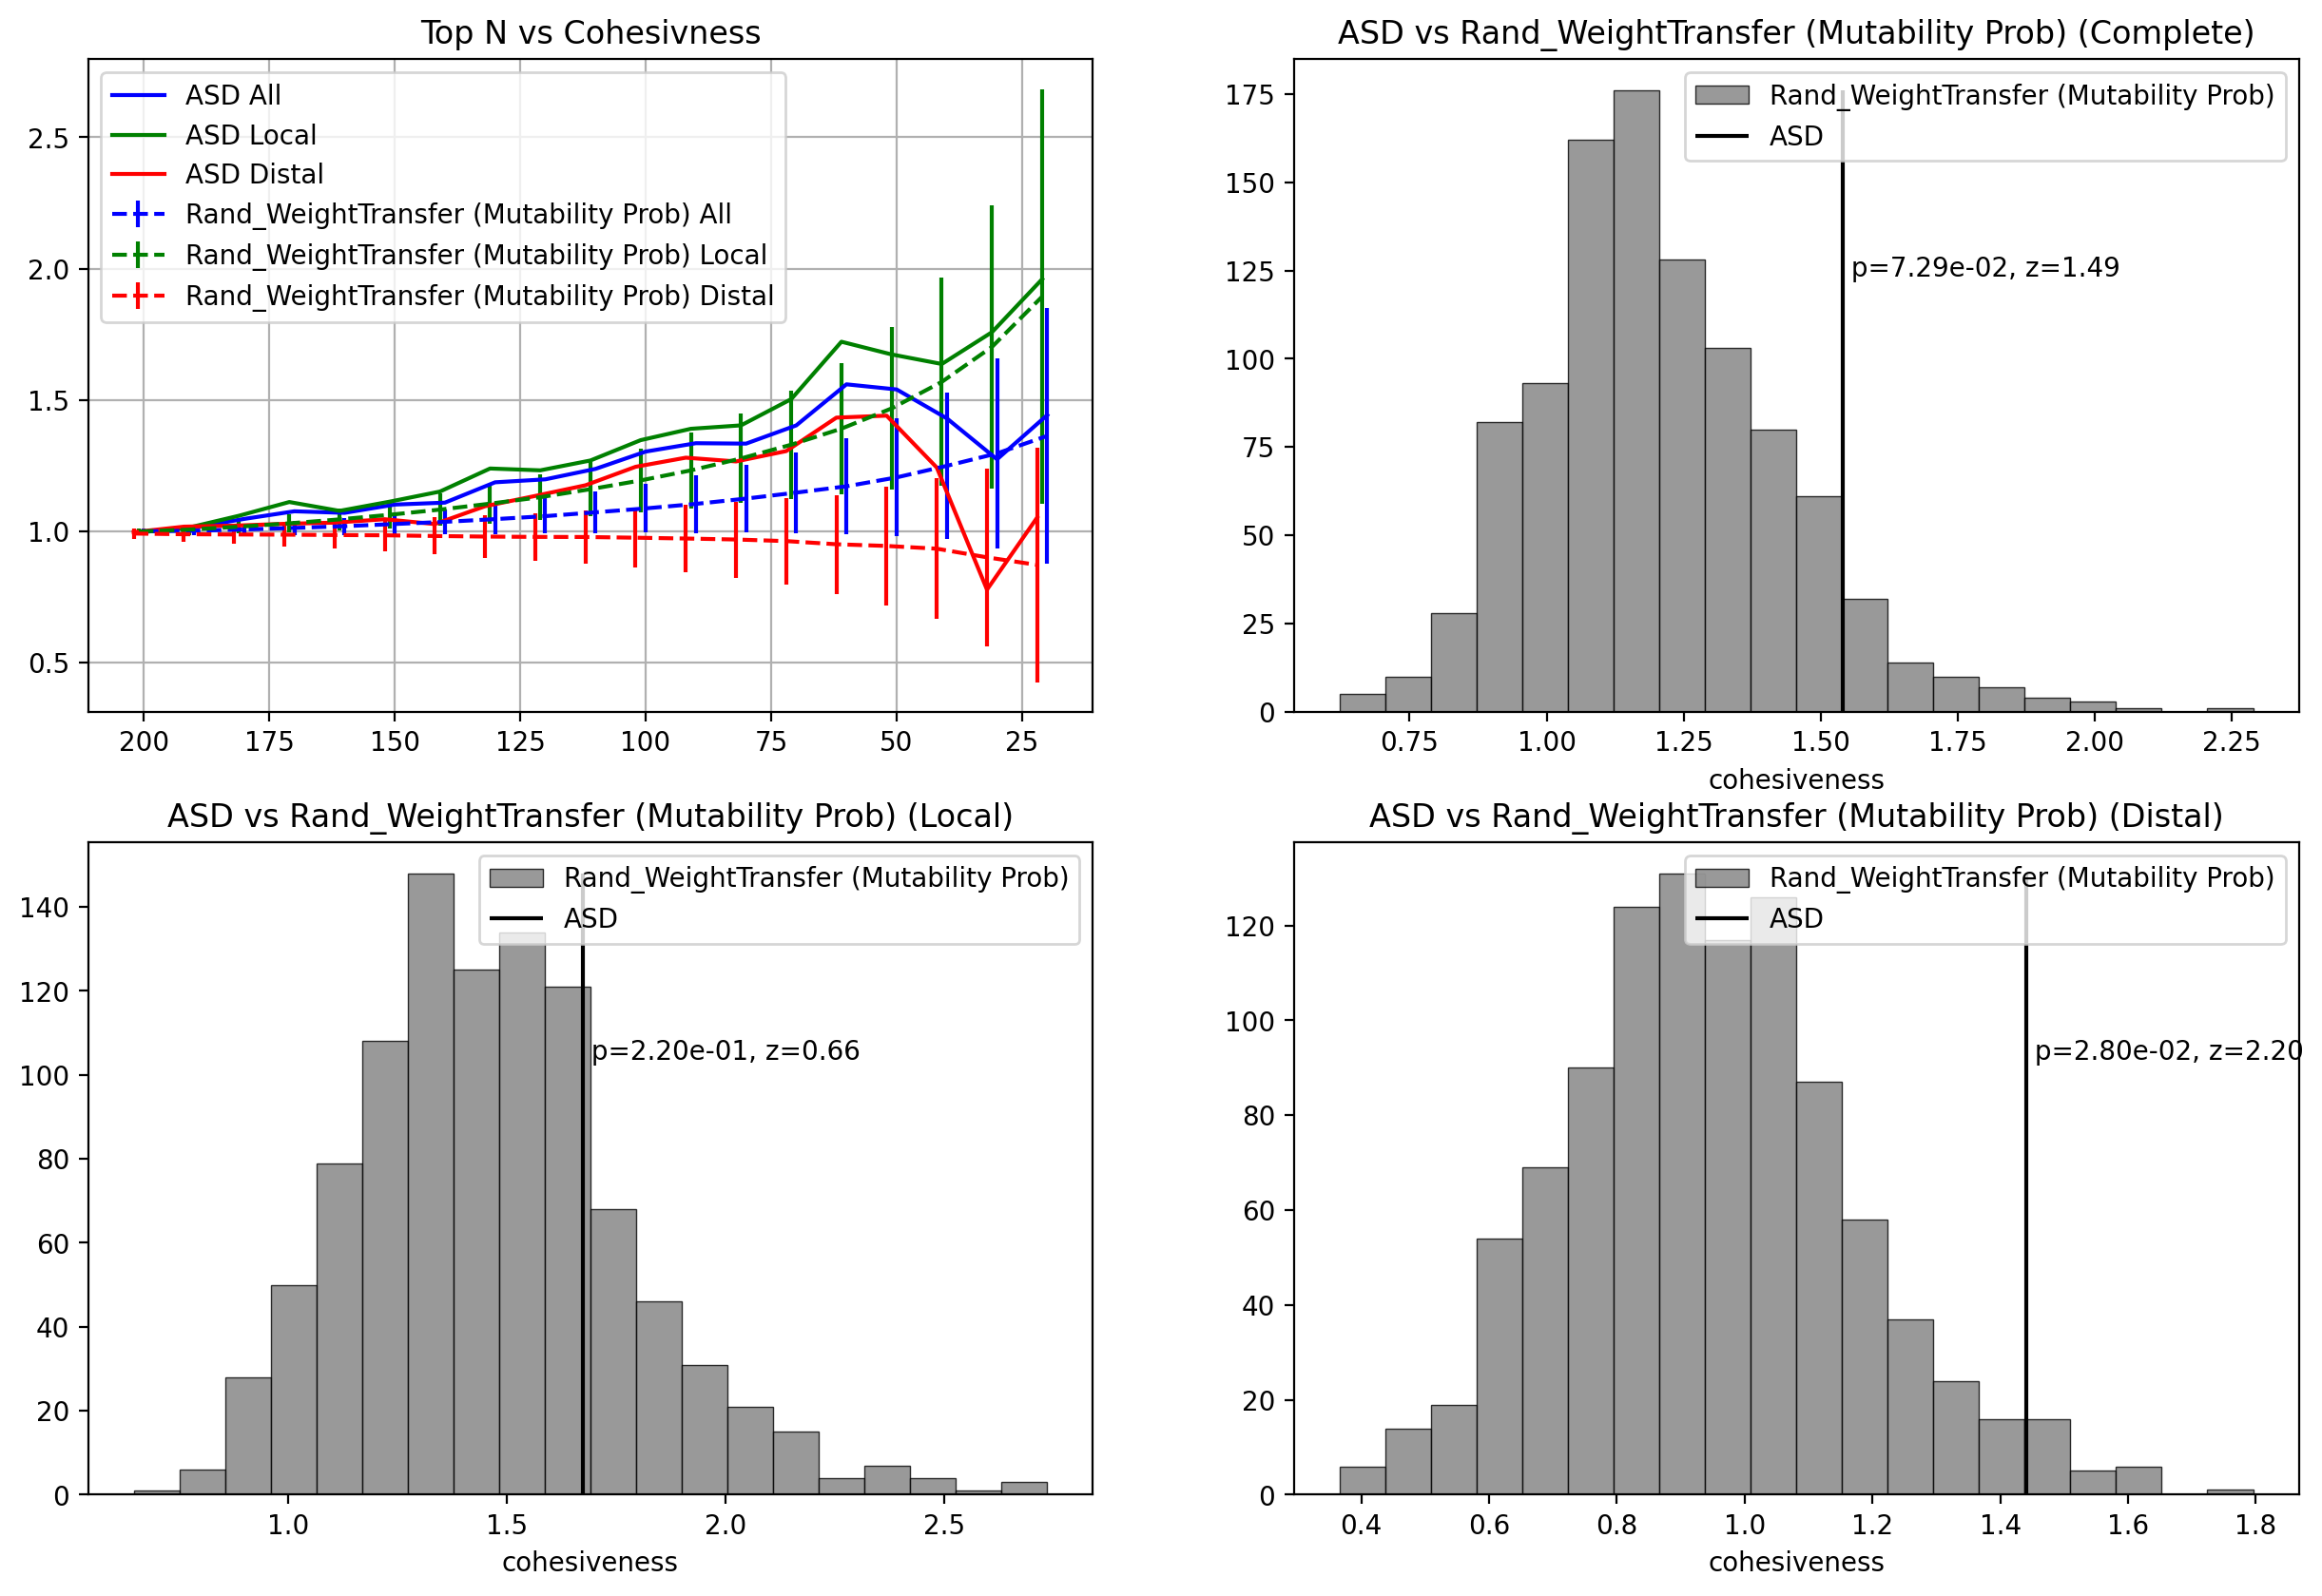

In [19]:
XXX(asd_topN_cohe, asd_topN_cohe_local, asd_topN_cohe_distal,
    Cont1_Cohesivness, Cont1_Cohesivness_local, Cont1_Cohesivness_distal, 
    "Rand_WeightTransfer (Mutability Prob)")

In [20]:
pp1, pp2, pp3 = [], [], []
zz1, zz2, zz3 = [], [], []
for idx, n in enumerate(topNs):
    z1, p1 = GetPermutationP(Cont1_Cohesivness[:, idx], asd_topN_cohe[idx])
    z2, p2 = GetPermutationP(Cont1_Cohesivness_local[:, idx], asd_topN_cohe_local[idx])
    z3, p3 = GetPermutationP(Cont1_Cohesivness_distal[:, idx], asd_topN_cohe_distal[idx])
    pp1.append(p1)
    pp2.append(p2)
    pp3.append(p3)
    zz1.append(z1)
    zz2.append(z2)
    zz3.append(z3)

Text(0, 0.5, '-log10(pvalue)')

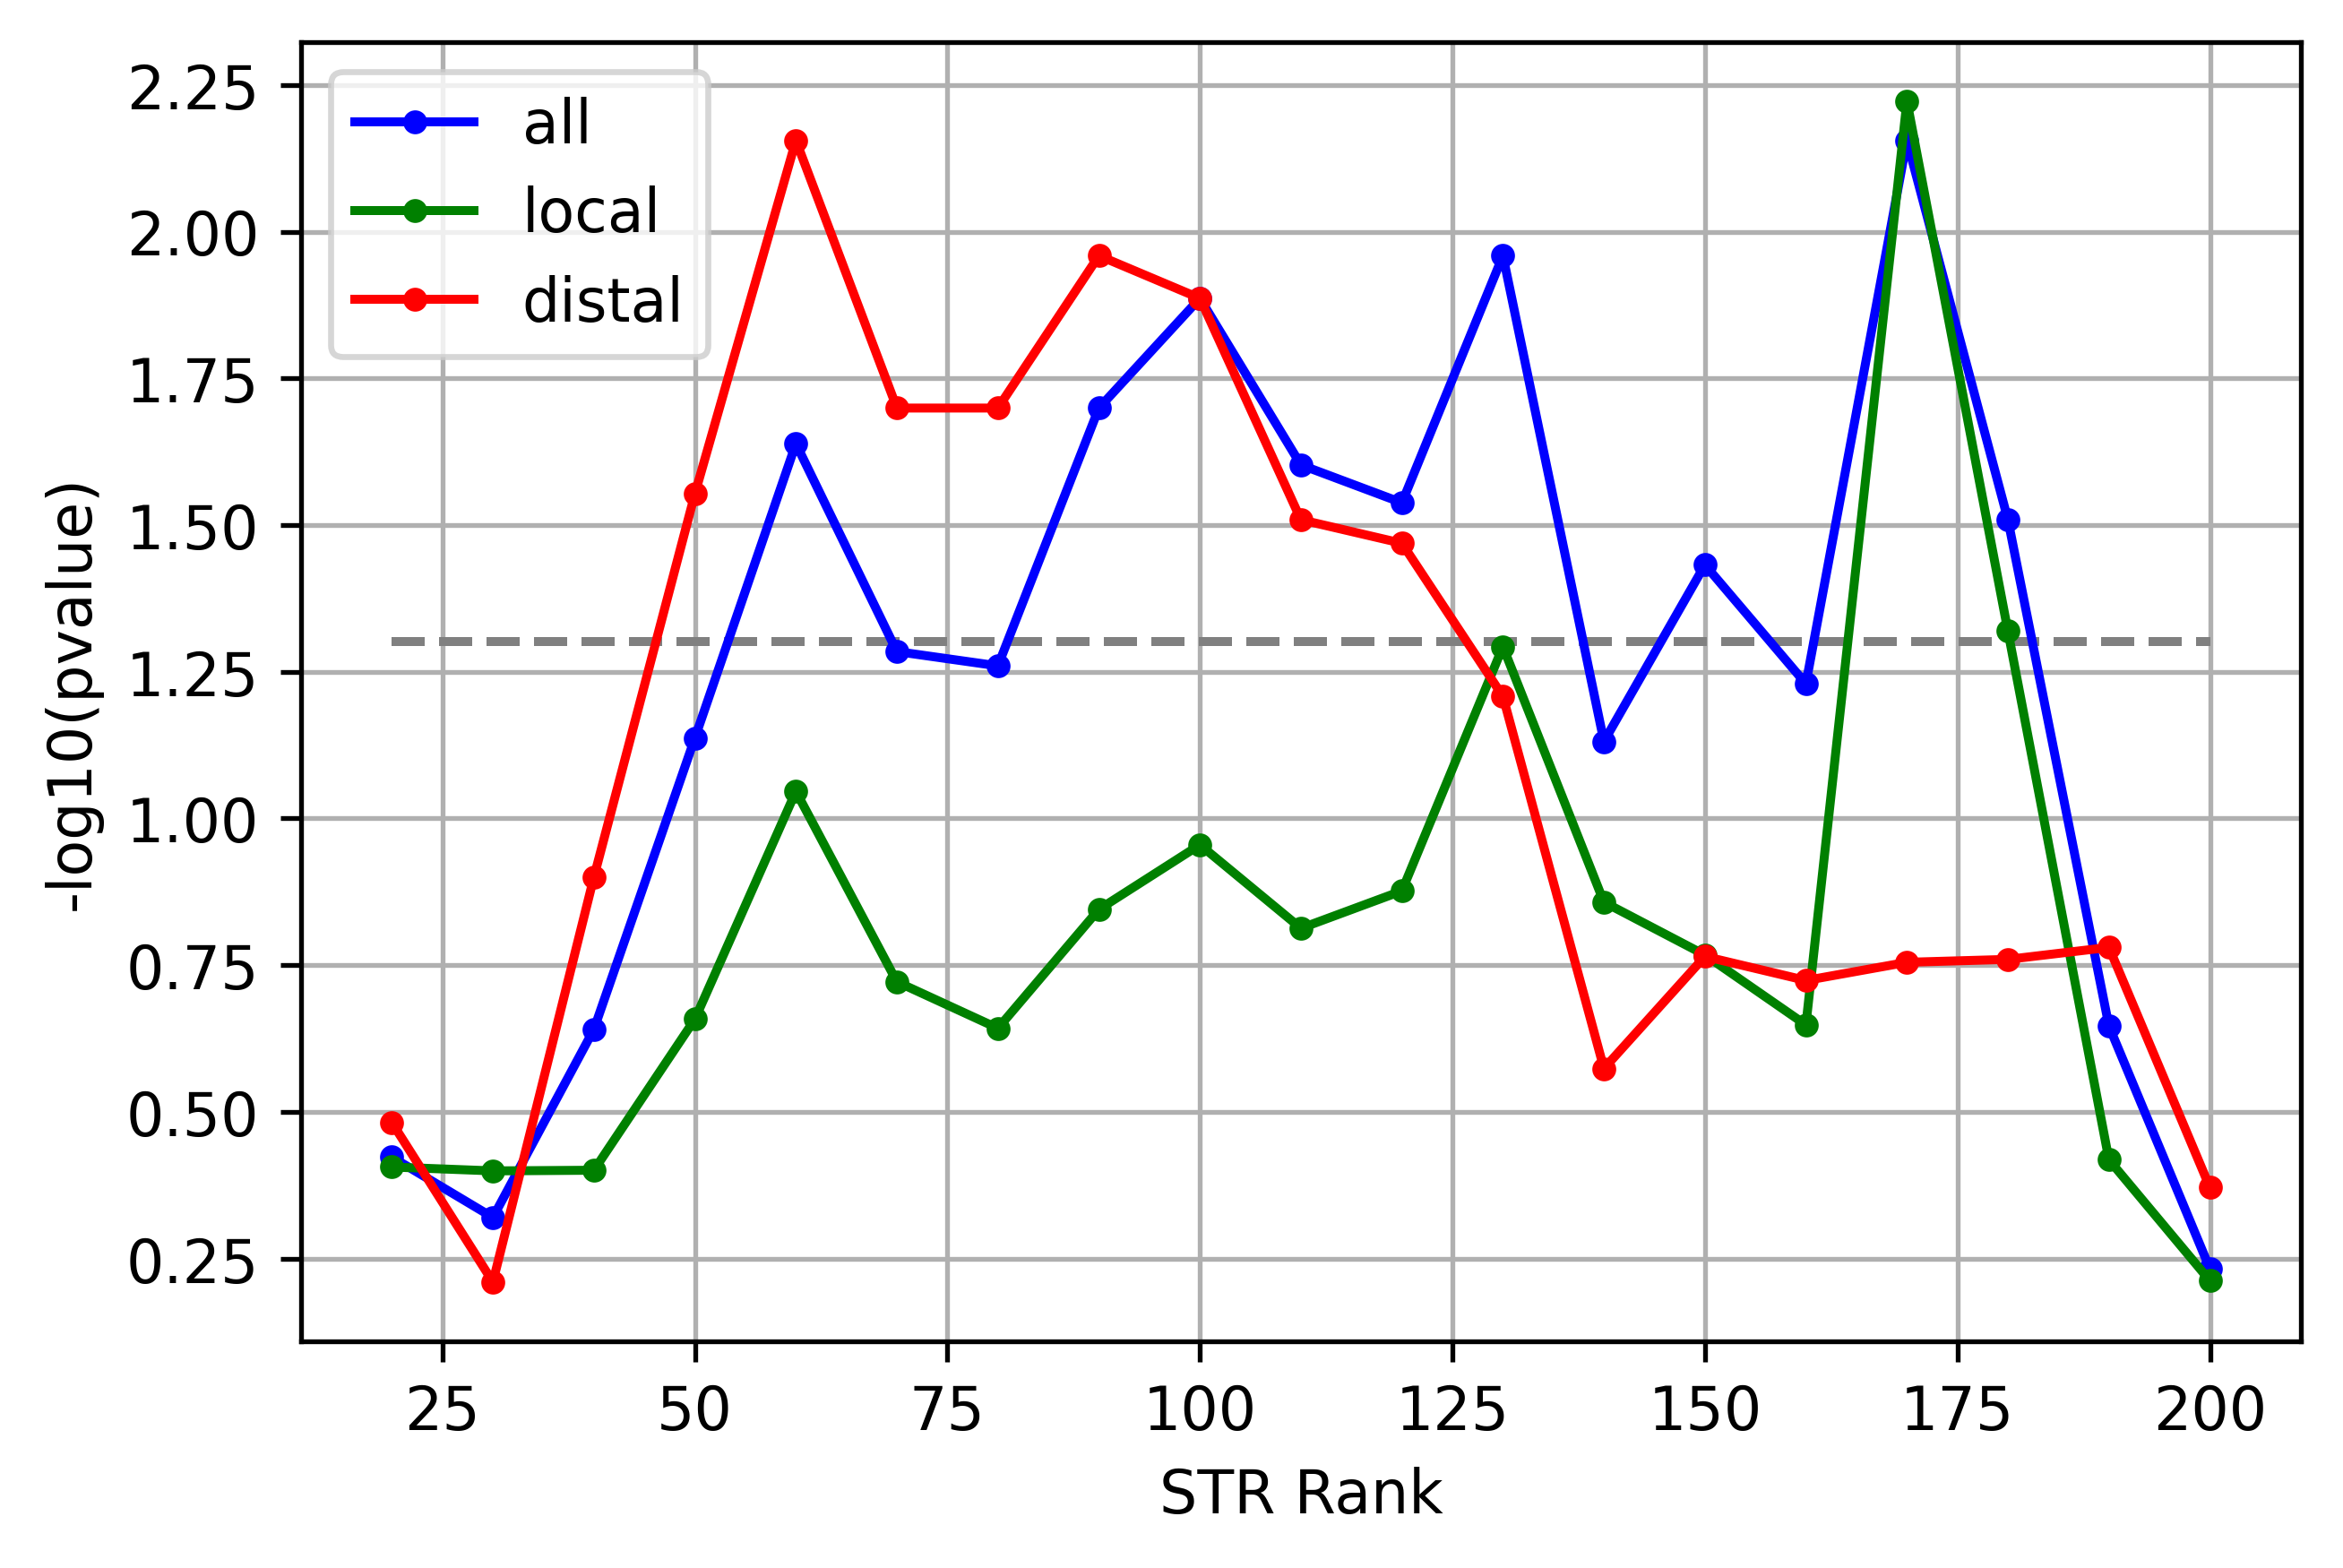

In [37]:
fig, ax = plt.subplots(dpi=480)
ax.plot(topNs, -np.log10(pp1), color="blue", label="all", marker=".")
ax.plot(topNs, -np.log10(pp2), color="green", label="local", marker=".")
ax.plot(topNs, -np.log10(pp3), color="red", label="distal", marker=".")
ax.hlines(xmin=20, xmax=200, y=-np.log10(0.05), color="grey", ls="dashed")
plt.grid(True)
plt.legend()
plt.xlabel("STR Rank")
plt.ylabel("-log10(pvalue)")
#ax.set_yscale('log')

In [30]:
np.log10(0.05)

-1.3010299956639813

In [15]:

print(topNs)
match_dir = "dat/Control_GeneSet_Bias/Rand_Gene_WeightTransfer/"
Cont1_Cohesivness = []
Cont1_Cohesivness_local = []
Cont1_Cohesivness_distal = []
for i, file in enumerate(os.listdir(match_dir)):
    df = pd.read_csv(match_dir + file, index_col="STR")
    topN_cohe_all = []
    topN_cohe_local = []
    topN_cohe_distal = []
    for topN in topNs:
        top_strs = df.index.values[:topN]
        topN_cohe_all.append(ScoreSTRSet(graph, top_strs, {})[0])
        topN_cohe_local.append(ScoreSTRSet(graph_local, top_strs, {})[0])
        topN_cohe_distal.append(ScoreSTRSet(graph_distal, top_strs, {})[0])
    topN_cohe_all = np.array(topN_cohe_all)
    topN_cohe_local = np.array(topN_cohe_local)
    topN_cohe_distal = np.array(topN_cohe_distal)
    Cont1_Cohesivness.append(topN_cohe_all)
    Cont1_Cohesivness_local.append(topN_cohe_local)
    Cont1_Cohesivness_distal.append(topN_cohe_distal)
Cont1_Cohesivness = np.array(Cont1_Cohesivness)
Cont1_Cohesivness_local = np.array(Cont1_Cohesivness_local)
Cont1_Cohesivness_distal = np.array(Cont1_Cohesivness_distal)

[200 190 180 170 160 150 140 130 120 110 100  90  80  70  60  50  40  30
  20]


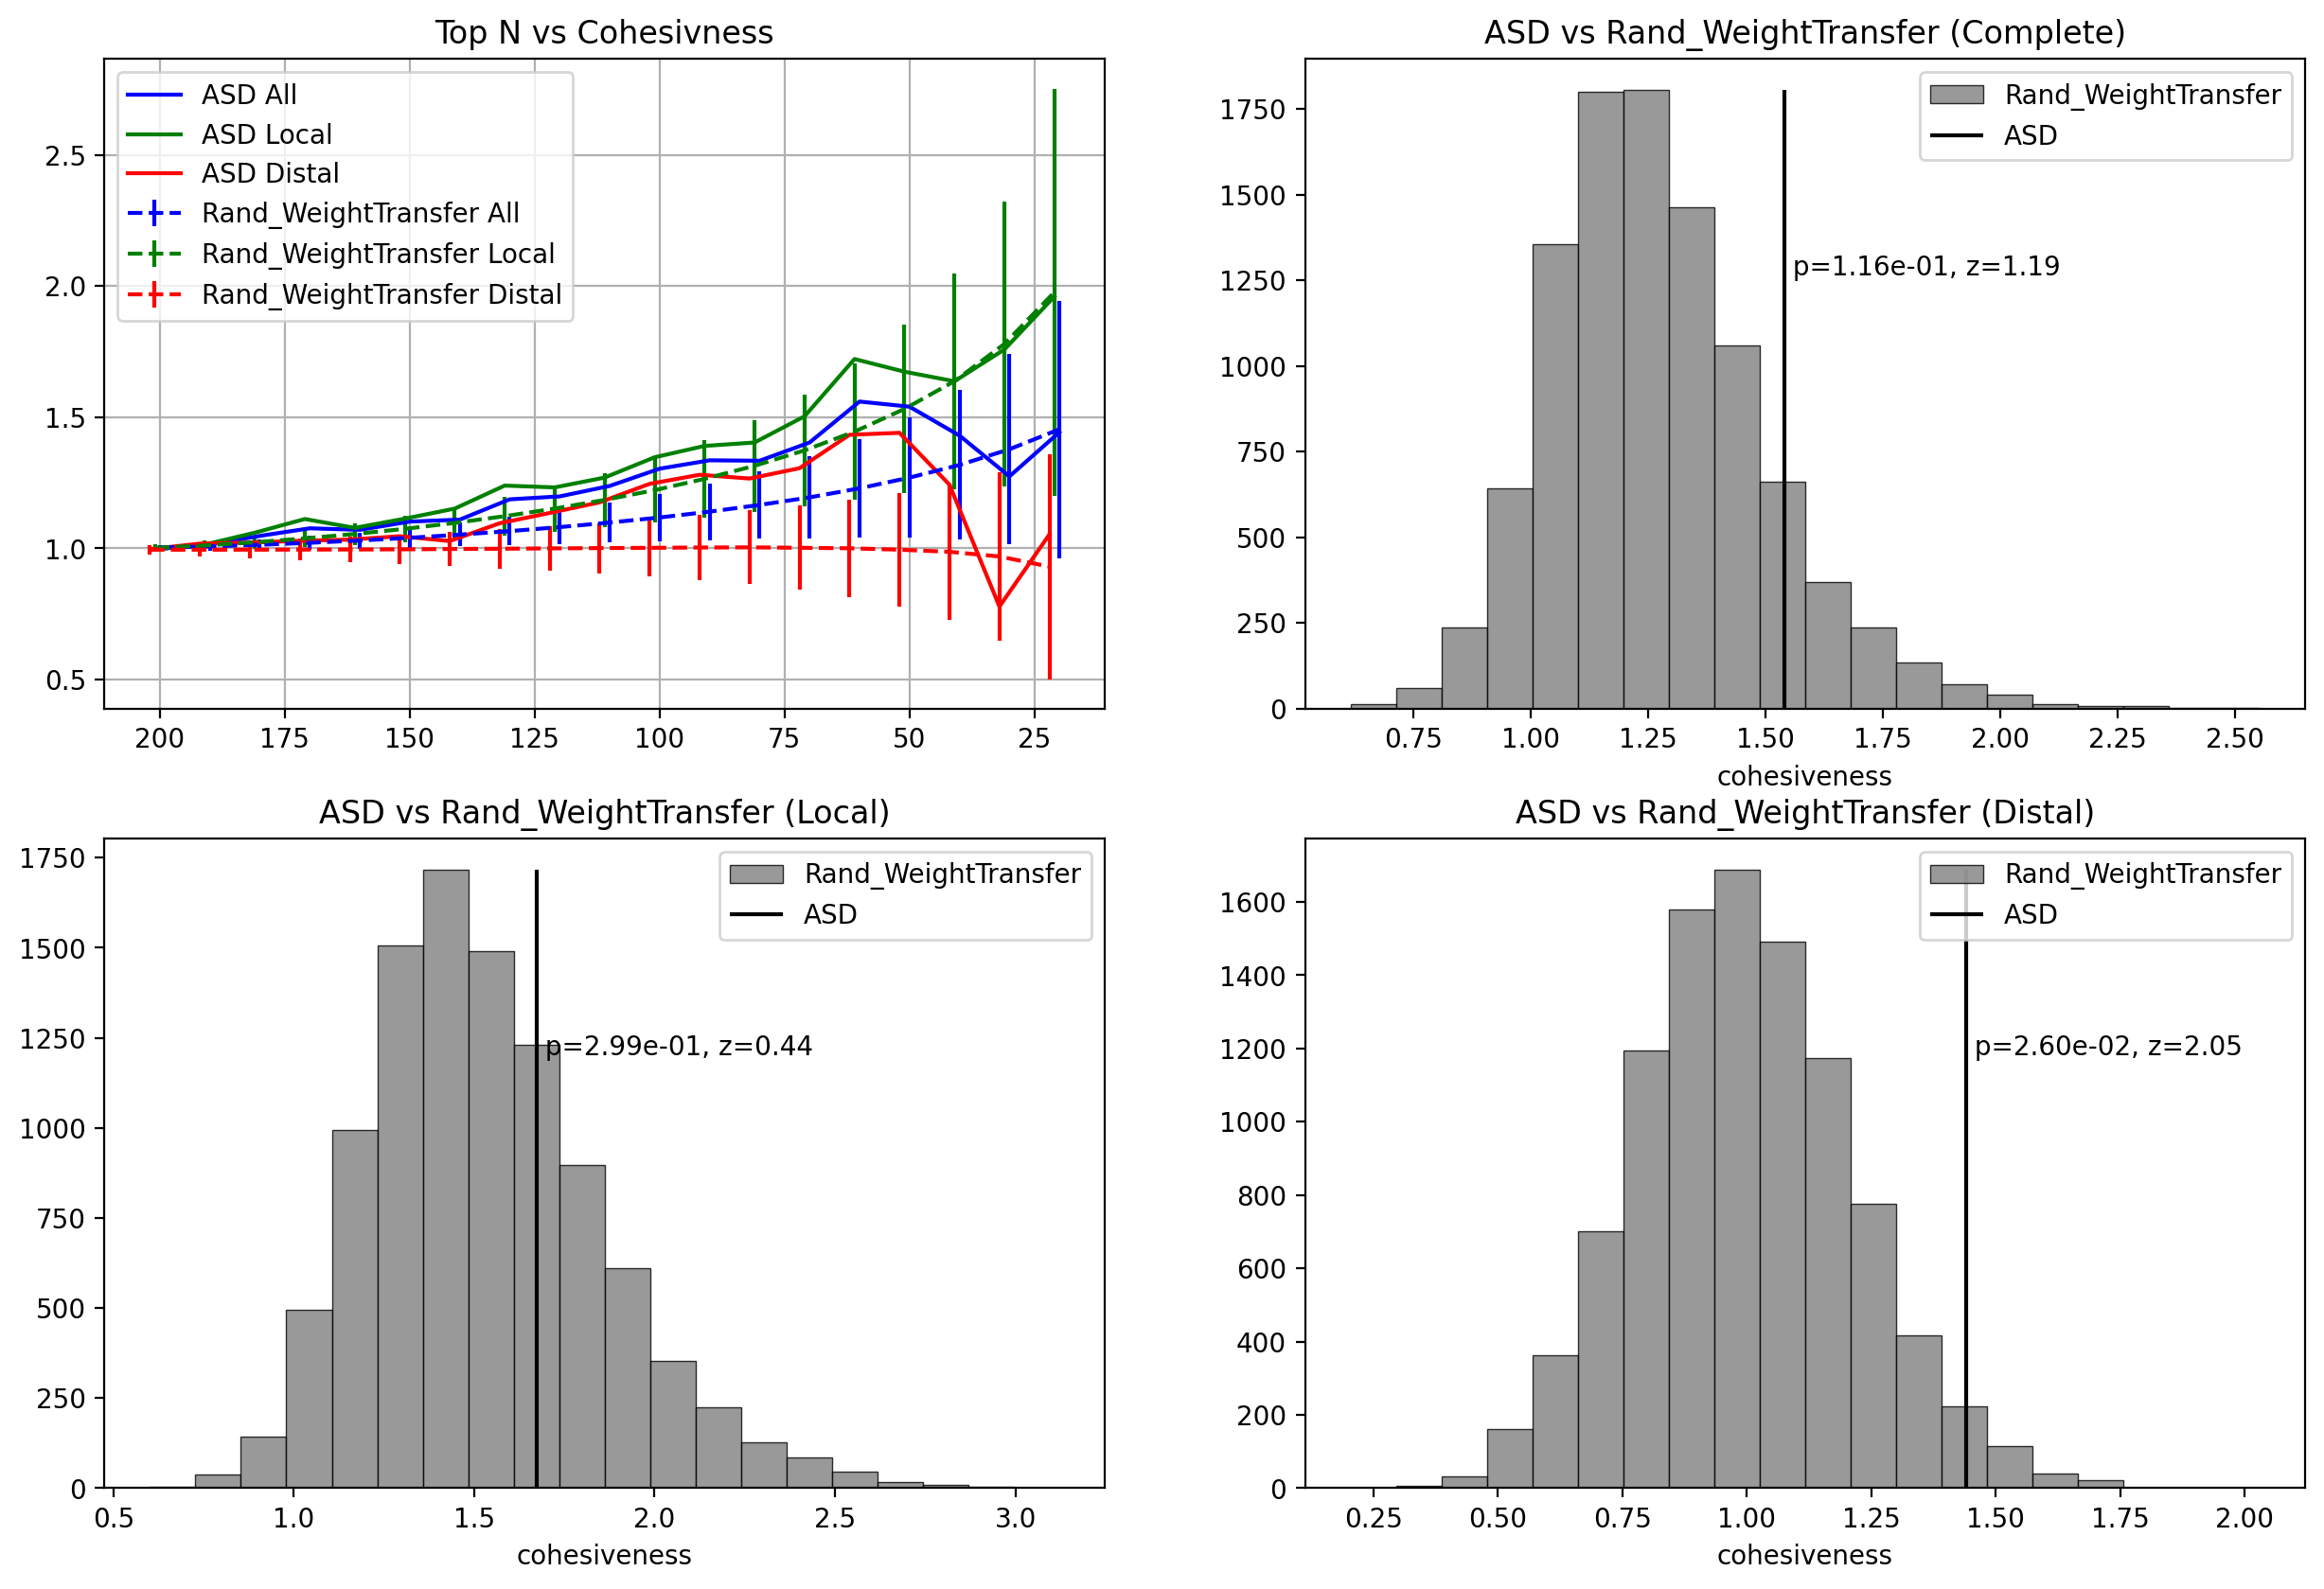

In [16]:
XXX(asd_topN_cohe, asd_topN_cohe_local, asd_topN_cohe_distal,
    Cont1_Cohesivness, Cont1_Cohesivness_local, Cont1_Cohesivness_distal, 
    "Rand_WeightTransfer")

In [225]:
topNs = np.arange(200, 10, -10)
print(topNs)
match_dir = "dat/Control_GeneSet_Bias/Rand_Gene_WeightTransfer/"
Cont1_Cohesivness_w = []
Cont1_Cohesivness_local_w = []
Cont1_Cohesivness_distal_w = []
for i, file in enumerate(os.listdir(match_dir)):
    df = pd.read_csv(match_dir + file, index_col="STR")
    topN_cohe_all = []
    topN_cohe_local = []
    topN_cohe_distal = []
    for topN in topNs:
        top_strs = df.index.values[:topN]
        topN_cohe_all.append(ScoreSTRSet(graph, top_strs, 
                                         EdgeWeightsDict, Weighted=True)[0])
        topN_cohe_local.append(ScoreSTRSet(graph_local, top_strs, 
                                           EdgeWeightsDict, Weighted=True)[0])
        topN_cohe_distal.append(ScoreSTRSet(graph_distal, top_strs, 
                                            EdgeWeightsDict, Weighted=True)[0])
    topN_cohe_all = np.array(topN_cohe_all)
    topN_cohe_local = np.array(topN_cohe_local)
    topN_cohe_distal = np.array(topN_cohe_distal)
    Cont1_Cohesivness_w.append(topN_cohe_all)
    Cont1_Cohesivness_local_w.append(topN_cohe_local)
    Cont1_Cohesivness_distal_w.append(topN_cohe_distal)
Cont1_Cohesivness_w = np.array(Cont1_Cohesivness_w)
Cont1_Cohesivness_local_w = np.array(Cont1_Cohesivness_local_w)
Cont1_Cohesivness_distal_w = np.array(Cont1_Cohesivness_distal_w)

[200 190 180 170 160 150 140 130 120 110 100  90  80  70  60  50  40  30
  20]


In [227]:
asd_topN_cohe_w = []
asd_topN_cohe_local_w = []
asd_topN_cohe_distal_w = []
for topN in topNs:
    top_strs = STR_Ranks[:topN]
    asd_topN_cohe_w.append(ScoreSTRSet(graph, top_strs, EdgeWeightsDict,Weighted=True)[0])
    asd_topN_cohe_local_w.append(ScoreSTRSet(graph_local, top_strs, EdgeWeightsDict, Weighted=True)[0])
    asd_topN_cohe_distal_w.append(ScoreSTRSet(graph_distal, top_strs, EdgeWeightsDict, Weighted=True)[0])
print(asd_topN_cohe_w[-4])


0.361513943086262


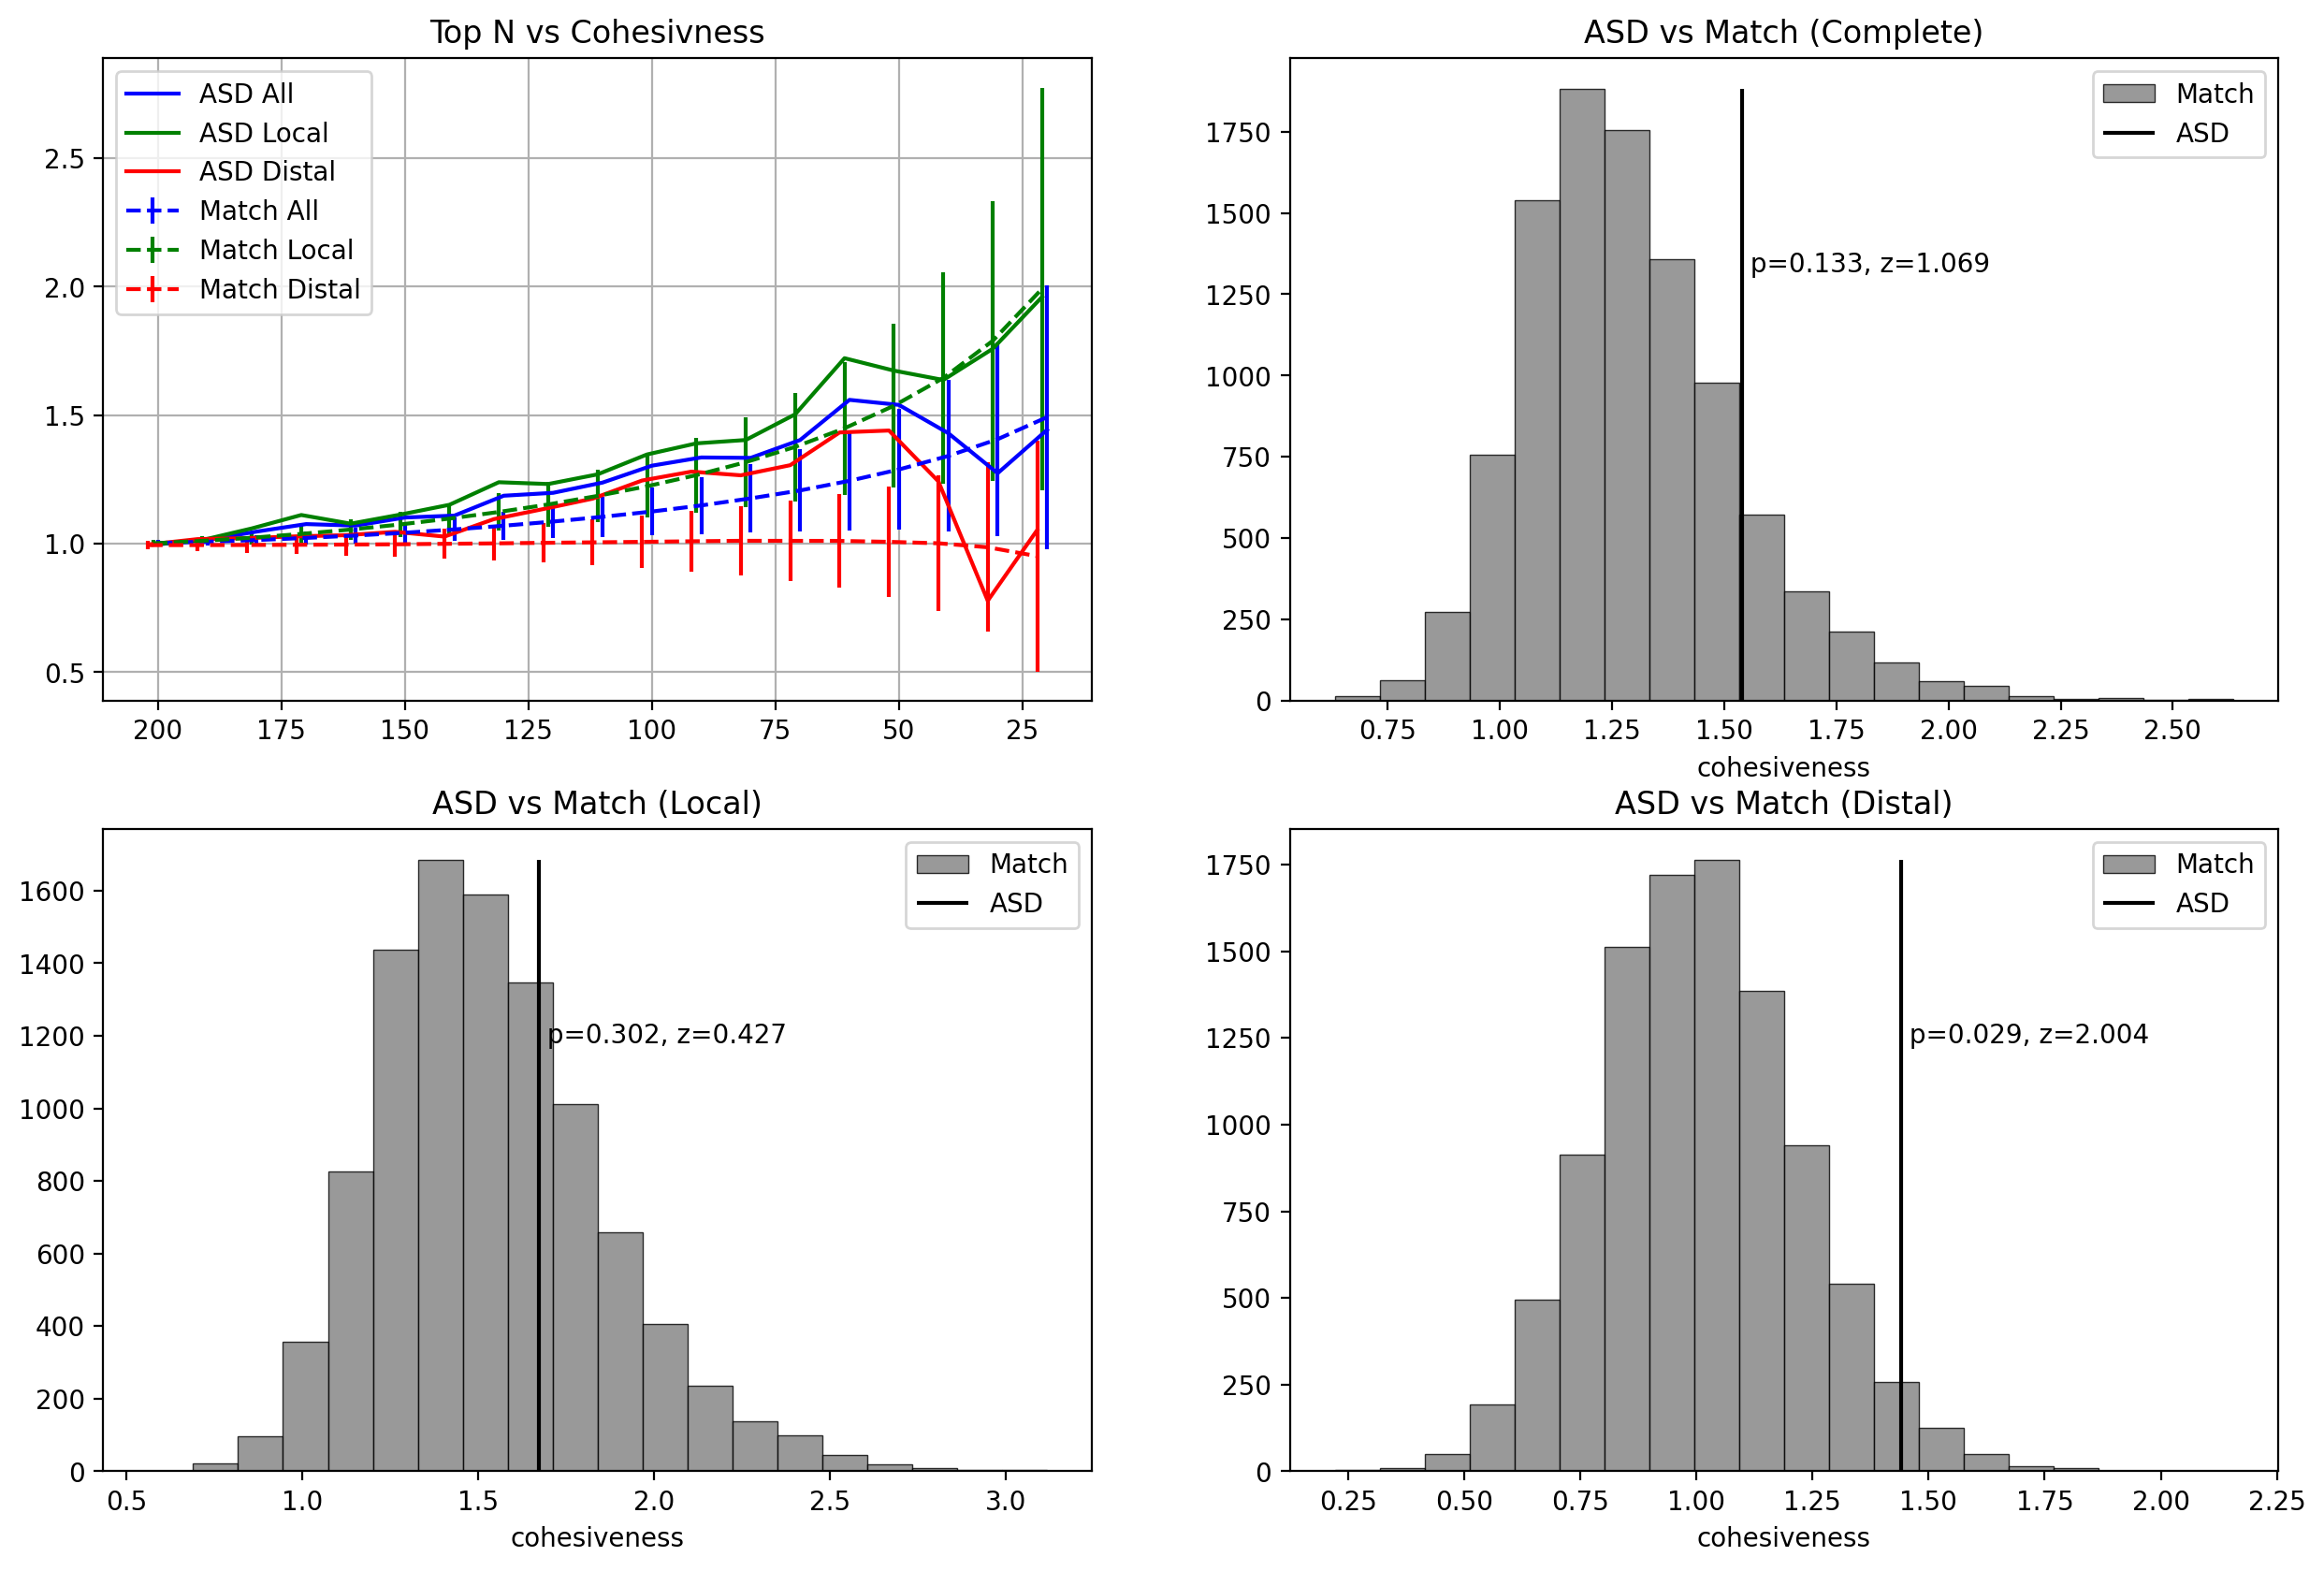

In [242]:
XXX(asd_topN_cohe_w, asd_topN_cohe_local_w,asd_topN_cohe_distal_w,
    Cont1_Cohesivness_w, Cont1_Cohesivness_local_w, Cont1_Cohesivness_distal_w, "Match")

In [187]:
np.argmax(Cont1_Cohesivness_distal[:, -4])

3711

In [248]:
idx = -3
print(asd_topN_cohe_local_w[idx])
print(asd_topN_cohe_distal_w[idx])
print(Cont1_Cohesivness_local[3711, idx])
print(Cont1_Cohesivness_distal[3711, idx])

0.30740726498103477
0.2333695489501034
0.4874497977604591
0.4257754361891853


In [233]:
match_dir = "dat/Control_GeneSet_Bias/Rand_Gene_WeightTransfer/"
filenames = []
for i, file in enumerate(os.listdir(match_dir)):
    #if i == 3711:
    #    df = pd.read_csv(match_dir + file, index_col="STR")
    #    top_strs = df.index.values[:50]
    #    x = ScoreSTRSet(graph_distal, top_strs, {})[0]
    #    print(i, file, x)
    df = pd.read_csv(match_dir + file, index_col="STR")
    top_strs = df.index.values[:50]
    #xxScoreSTRSet(graph, top_strs, {})[0])
    x = ScoreSTRSet(graph_distal, top_strs, {})[0]
    if x > 0.4:
        filenames.append(file)
        print(i, file, x)
    #    break

233 cont.bias.1207.csv 0.40406103173098556
1157 cont.bias.2041.csv 0.4056996543144365
1246 cont.bias.2121.csv 0.4035669159709557
1258 cont.bias.2132.csv 0.405437509678287
2873 cont.bias.3593.csv 0.411022398321593
3054 cont.bias.3756.csv 0.41062113107808706
3711 cont.bias.4348.csv 0.47669387893979814
4490 cont.bias.5049.csv 0.40841385920936707
5029 cont.bias.5534.csv 0.4338085095480721
5164 cont.bias.5656.csv 0.40180779664904576
6034 cont.bias.6439.csv 0.40347141930604047
7346 cont.bias.762.csv 0.4048730686910993
8275 cont.bias.8457.csv 0.4619177751888885
9356 cont.bias.943.csv 0.44284332016848105
9882 cont.bias.9903.csv 0.42125634782765287
9889 cont.bias.991.csv 0.4041397017335235


In [235]:
df1 = pd.read_csv(match_dir + filenames[1], index_col="STR")
top_strs1 = df1.index.values[:50]
df2 = pd.read_csv(match_dir + filenames[2], index_col="STR")
top_strs2 = df2.index.values[:50]

In [236]:
print(len(set(top_strs1).intersection(set(top_strs2))))

27


In [238]:
for i,j in itertools.permutations(filenames, 2):
    #print(i,j)
    df1 = pd.read_csv(match_dir + i, index_col="STR")
    top_strs1 = df1.index.values[:50]
    df2 = pd.read_csv(match_dir + j, index_col="STR")
    top_strs2 = df2.index.values[:50]
    common = len(set(top_strs1).intersection(set(top_strs2)))
    print(common)

18
16
2
21
19
22
20
21
11
12
21
23
0
19
21
18
27
3
11
23
15
21
7
20
26
12
27
3
15
24
16
27
1
17
20
21
23
13
14
23
18
30
1
19
26
2
3
1
2
2
3
2
5
3
3
4
1
31
2
1
21
11
17
2
24
25
22
28
2
11
27
20
4
25
20
19
23
20
2
24
20
25
20
12
20
20
21
2
17
19
22
15
21
3
25
20
20
31
4
13
30
23
1
30
27
20
21
23
2
22
25
20
21
11
20
24
27
3
17
22
21
7
13
5
28
20
31
21
3
5
32
18
5
31
19
11
20
14
3
2
12
4
11
3
24
5
10
1
1
13
12
26
23
3
11
20
13
20
5
24
7
23
0
9
19
21
12
18
4
27
20
30
24
32
5
7
20
2
26
20
23
27
30
1
20
21
23
27
18
10
23
20
2
23
29
0
3
1
31
4
2
1
3
5
1
0
2
2
3
0
19
15
19
2
25
17
30
17
31
1
9
26
23
3
20
21
24
26
1
20
19
27
22
19
13
19
20
29
0
20


In [224]:
ASD_STR_Ranks
x1 = ScoreSTRSet(graph_distal, ASD_STR_Ranks[:50], EdgeWeightsDict, Weighted=False)
x2 = ScoreSTRSet(graph_distal, ASD_STR_Ranks[:50], EdgeWeightsDict, Weighted=True)
print(x1, x2)

(0.33785179406875615, 193) (0.3380982945998527, 193)


In [222]:
ScoreSTRSet(graph_distal, top_strs, EdgeWeightsDict, Weighted=True)

(0.4724669426462808, 198)

In [240]:
df = pd.read_csv(match_dir + "cont.bias.991.csv", index_col="STR")
df.head(50)

,EFFECT,REGION,Rank
STR,,,
Paraventricular_nucleus_of_the_thalamus,0.506249,Thalamus,1
Parataenial_nucleus,0.460517,Thalamus,2
Central_medial_nucleus_of_the_thalamus,0.414803,Thalamus,3
Cortical_amygdalar_area_anterior_part,0.411818,Amygdalar,4
Rhomboid_nucleus,0.397926,Thalamus,5
Intercalated_amygdalar_nucleus,0.381459,Amygdalar,6
Cortical_amygdalar_area_posterior_part,0.356850,Amygdalar,7
Basomedial_amygdalar_nucleus,0.355056,Amygdalar,8
Nucleus_of_reuniens,0.343622,Thalamus,9


In [373]:
cohe_exp = np.array((np.array(topNs)/213))
Zscores = []
Peaks = []
for i in range(Cont1_Cohesivness_distal.shape[0]):
    _Profile_i = Cont1_Cohesivness_distal[i, :]
    _peak_idx = np.argmax(_Profile_i/cohe_exp)
    _peak = topNs[_peak_idx]
    Peaks.append(_peak)
    #print(_Profile_i/cohe_exp)
    #print(_peak_idx)
    z, p = GetPermutationP(Cont1_Cohesivness_distal[:, _peak_idx], 
                           Cont1_Cohesivness_distal[i, _peak_idx])
    Zscores.append(z)

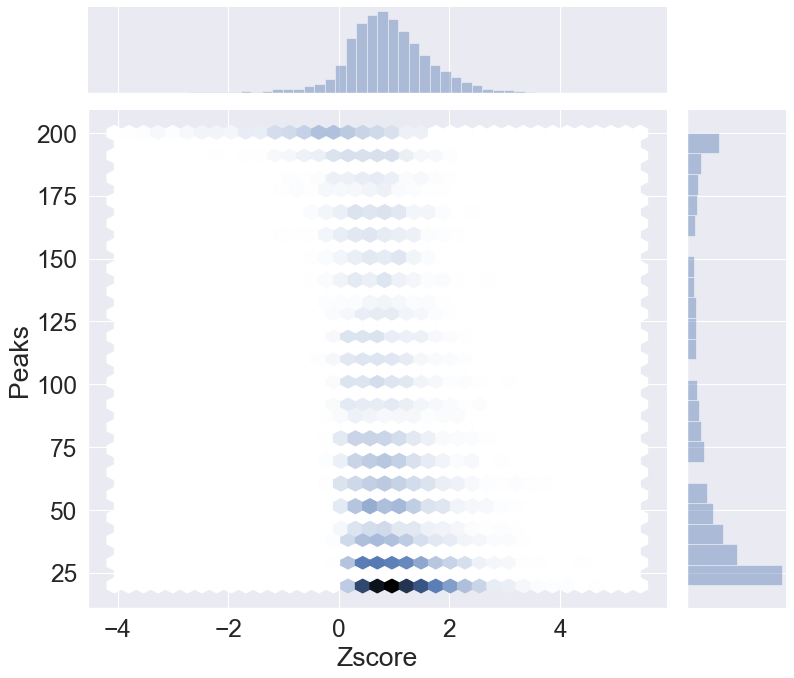

In [374]:
_data = pd.DataFrame(data={"Zscore":Zscores, "Peaks":Peaks})
plot = sns.jointplot(data=_data, x="Zscore", y="Peaks", kind="hex")
plot.fig.set_figwidth(12)
plot.fig.set_figheight(10)
sns.set(font_scale=2)

In [365]:
cohe_exp = np.array((np.array(topNs)/213))
Zscores = []
Peaks = []
for i in range(Cont1_Cohesivness.shape[0]):
    _Profile_i = Cont1_Cohesivness[i, :]
    _peak_idx = np.argmax(_Profile_i/cohe_exp)
    _peak = topNs[_peak_idx]
    Peaks.append(_peak)
    z, p = GetPermutationP(Cont1_Cohesivness[:, _peak_idx], 
                           Cont1_Cohesivness[i, _peak_idx])
    Zscores.append(z)

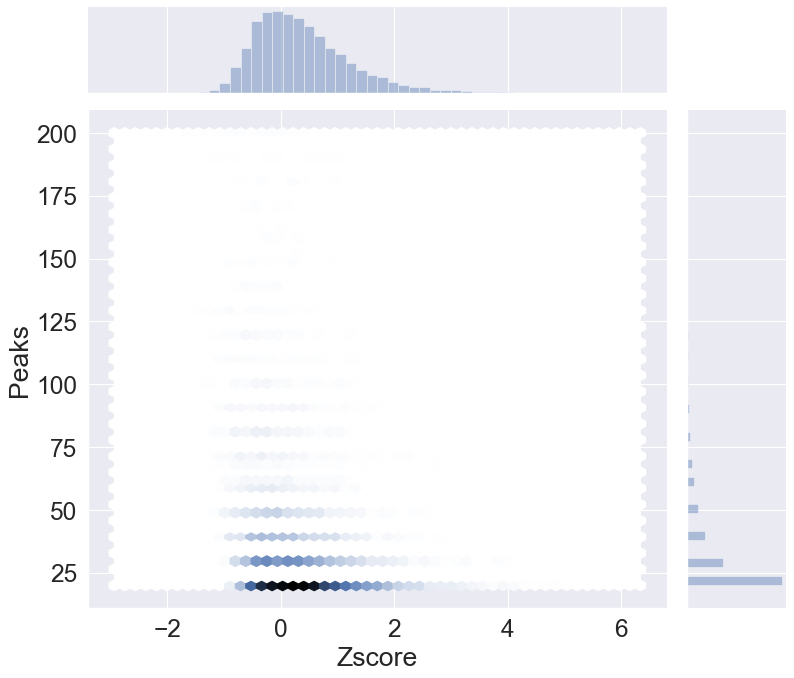

In [372]:
_data = pd.DataFrame(data={"Zscore":Zscores, "Peaks":Peaks})
plot = sns.jointplot(data=_data, x="Zscore", y="Peaks", kind="hex")
plot.fig.set_figwidth(12)
plot.fig.set_figheight(10)
sns.set(font_scale=2)

### Bias vs Cohe for top 50 controls

In [362]:
match_dir = "dat/Control_GeneSet_Bias/Rand_Gene_WeightTransfer/"
top_biases = []
top_cohees = []
for i, file in enumerate(os.listdir(match_dir)):
    df = pd.read_csv(match_dir + file, index_col="STR")
    top_bias = np.mean(df["EFFECT"].values[:50])
    top_strs = df.index.values[:50]
    #x = ScoreSTRSet(graph, top_strs, {})[0]
    #x = ScoreSTRSet(graph_local, top_strs, {})[0]
    x = ScoreSTRSet(graph_distal, top_strs, {})[0]
    top_biases.append(top_bias)
    top_cohees.append(x)

In [363]:
ASD_DF = pd.read_csv("dat/bias2/ASD.EW.pLI.z2.csv", index_col="STR")
top50_bias_asd = ASD_DF["EFFECT"].values[:50].mean()
#top50_cohe_asd = ScoreSTRSet(graph, ASD_DF.index.values[:50])[0]
#top50_cohe_asd = ScoreSTRSet(graph_local, ASD_DF.index.values[:50])[0]
top50_cohe_asd = ScoreSTRSet(graph_distal, ASD_DF.index.values[:50])[0]

(0.14734394403215095, 1.3684660811090919e-49)


<Figure size 1800x1800 with 0 Axes>

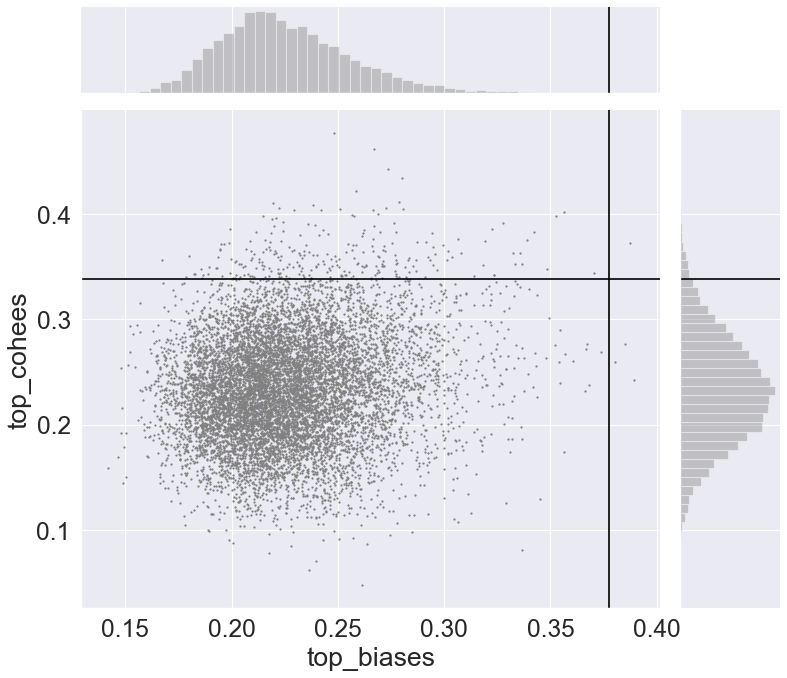

In [364]:
_data = pd.DataFrame(data={"top_biases":top_biases, "top_cohees":top_cohees})
#fig, ax = plt.subplots(dpi=120)
plt.figure(dpi=120, figsize=(15,15))
plot = sns.jointplot(data=_data, x="top_biases", y="top_cohees", s=1, color="grey",
             marginal_kws=dict(bins=50))
#plt.text(0, 0.4, s="xxx")
plot.ax_joint.axvline(x=top50_bias_asd, color="black")
plot.ax_joint.axhline(y=top50_cohe_asd, color="black")
plot.ax_marg_x.axvline(x=top50_bias_asd, color="black")
plot.ax_marg_y.axhline(y=top50_cohe_asd, color="black")
print(pearsonr(top_biases, top_cohees))
plot.fig.set_figwidth(12)
plot.fig.set_figheight(10)
sns.set(font_scale=2)

In [312]:
match_dir = "dat/Control_GeneSet_Bias/Rand_Gene_WeightTransfer/"
top_biases = []
top_cohees = []
for i, file in enumerate(os.listdir(match_dir)):
    df = pd.read_csv(match_dir + file, index_col="STR")
    top_bias = np.mean(df["EFFECT"].values[:50])
    top_strs = df.index.values[:50]
    x = ScoreSTRSet(graph_distal, top_strs, {})[0]
    top_biases.append(top_bias)
    top_cohees.append(x)

No handles with labels found to put in legend.


<AxesSubplot:>

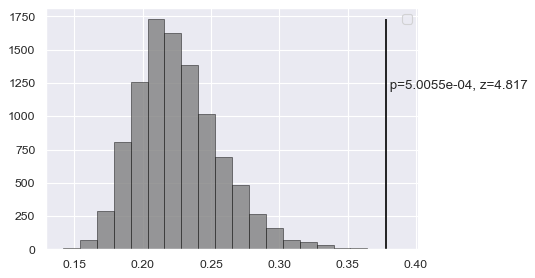

In [313]:
fig, ax = plt.subplots()
PlotPermutationP(top_biases, top50_bias_asd, ax)

Text(0, 0.5, 'top 50 cohesivness')

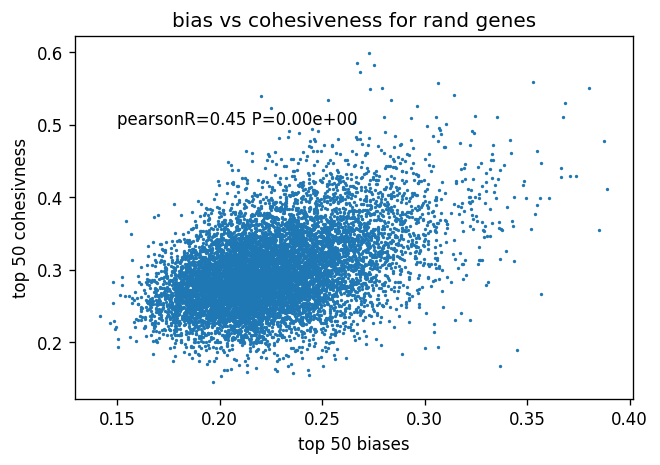

In [285]:
#fig, ax
plt.figure(dpi=120)
plt.scatter(top_biases, top_cohees, s=1)

X = top_biases
Y = top_cohees
lm = sm.OLS(Y, sm.add_constant(X)).fit()
X_plot = np.array([0.1, 0.4])
#plt.plot(X_plot, lm.params[0] + X_plot*(lm.params[1]), color="grey", ls="dashed")

r, p = pearsonr(top_biases, top_cohees)
plt.text(0.15, 0.5, s="pearsonR=%.2f P=%.2e"%(r,p))

plt.title("bias vs cohesiveness for rand genes")
plt.xlabel("top 50 biases")
plt.ylabel("top 50 cohesivness")

In [155]:
Cont1_Cohesivness_distal.shape

(9988, 19)

In [163]:
cohe_exp = np.array((np.array(topNs)/213))
Zscores = []
for i in range(Cont1_Cohesivness_distal.shape[0]):
    _Profile_i = Cont1_Cohesivness_distal[i, :]
    _peak_idx = np.argmax(_Profile_i/cohe_exp)
    #print(_Profile_i/cohe_exp)
    #print(_peak_idx)
    z, p = GetPermutationP(Cont1_Cohesivness_distal[:, _peak_idx], 
                           Cont1_Cohesivness_distal[i, _peak_idx])
    Zscores.append(z)
    #peak_idx = 

No handles with labels found to put in legend.


<AxesSubplot:>

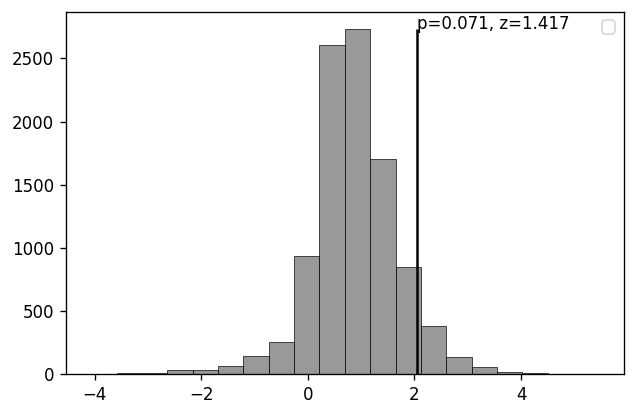

In [164]:
fig, ax = plt.subplots(dpi=120)
PlotPermutationP(Zscores, 2.048, ax)

In [165]:
cohe_exp = np.array((np.array(topNs)/213))
Zscores = []
for i in range(Cont1_Cohesivness.shape[0]):
    _Profile_i = Cont1_Cohesivness[i, :]
    _peak_idx = np.argmax(_Profile_i/cohe_exp)
    #print(_Profile_i/cohe_exp)
    #print(_peak_idx)
    z, p = GetPermutationP(Cont1_Cohesivness[:, _peak_idx], 
                           Cont1_Cohesivness[i, _peak_idx])
    Zscores.append(z)

No handles with labels found to put in legend.


<AxesSubplot:>

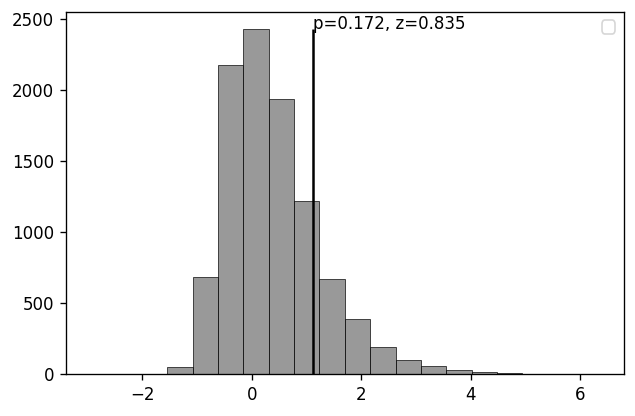

In [166]:
fig, ax = plt.subplots(dpi=120)
PlotPermutationP(Zscores, 1.126, ax)

In [176]:
topNs = np.arange(200, 10, -10)
print(topNs)
match_dir = "dat/Control_GeneSet_Bias/Rand_Gene_UniformWeight/"
Cont2_Cohesivness = []
Cont2_Cohesivness_local = []
Cont2_Cohesivness_distal = []
for i, file in enumerate(os.listdir(match_dir)):
    df = pd.read_csv(match_dir + file, index_col="STR")
    topN_cohe_all = []
    topN_cohe_local = []
    topN_cohe_distal = []
    for topN in topNs:
        top_strs = df.index.values[:topN]
        topN_cohe_all.append(ScoreSTRSet(graph, top_strs, {})[0])
        topN_cohe_local.append(ScoreSTRSet(graph_local, top_strs, {})[0])
        topN_cohe_distal.append(ScoreSTRSet(graph_distal, top_strs, {})[0])
    topN_cohe_all = np.array(topN_cohe_all)
    topN_cohe_local = np.array(topN_cohe_local)
    topN_cohe_distal = np.array(topN_cohe_distal)
    Cont2_Cohesivness.append(topN_cohe_all)
    Cont2_Cohesivness_local.append(topN_cohe_local)
    Cont2_Cohesivness_distal.append(topN_cohe_distal)
Cont2_Cohesivness = np.array(Cont2_Cohesivness)
Cont2_Cohesivness_local = np.array(Cont2_Cohesivness_local)
Cont2_Cohesivness_distal = np.array(Cont2_Cohesivness_distal)

[200 190 180 170 160 150 140 130 120 110 100  90  80  70  60  50  40  30
  20]


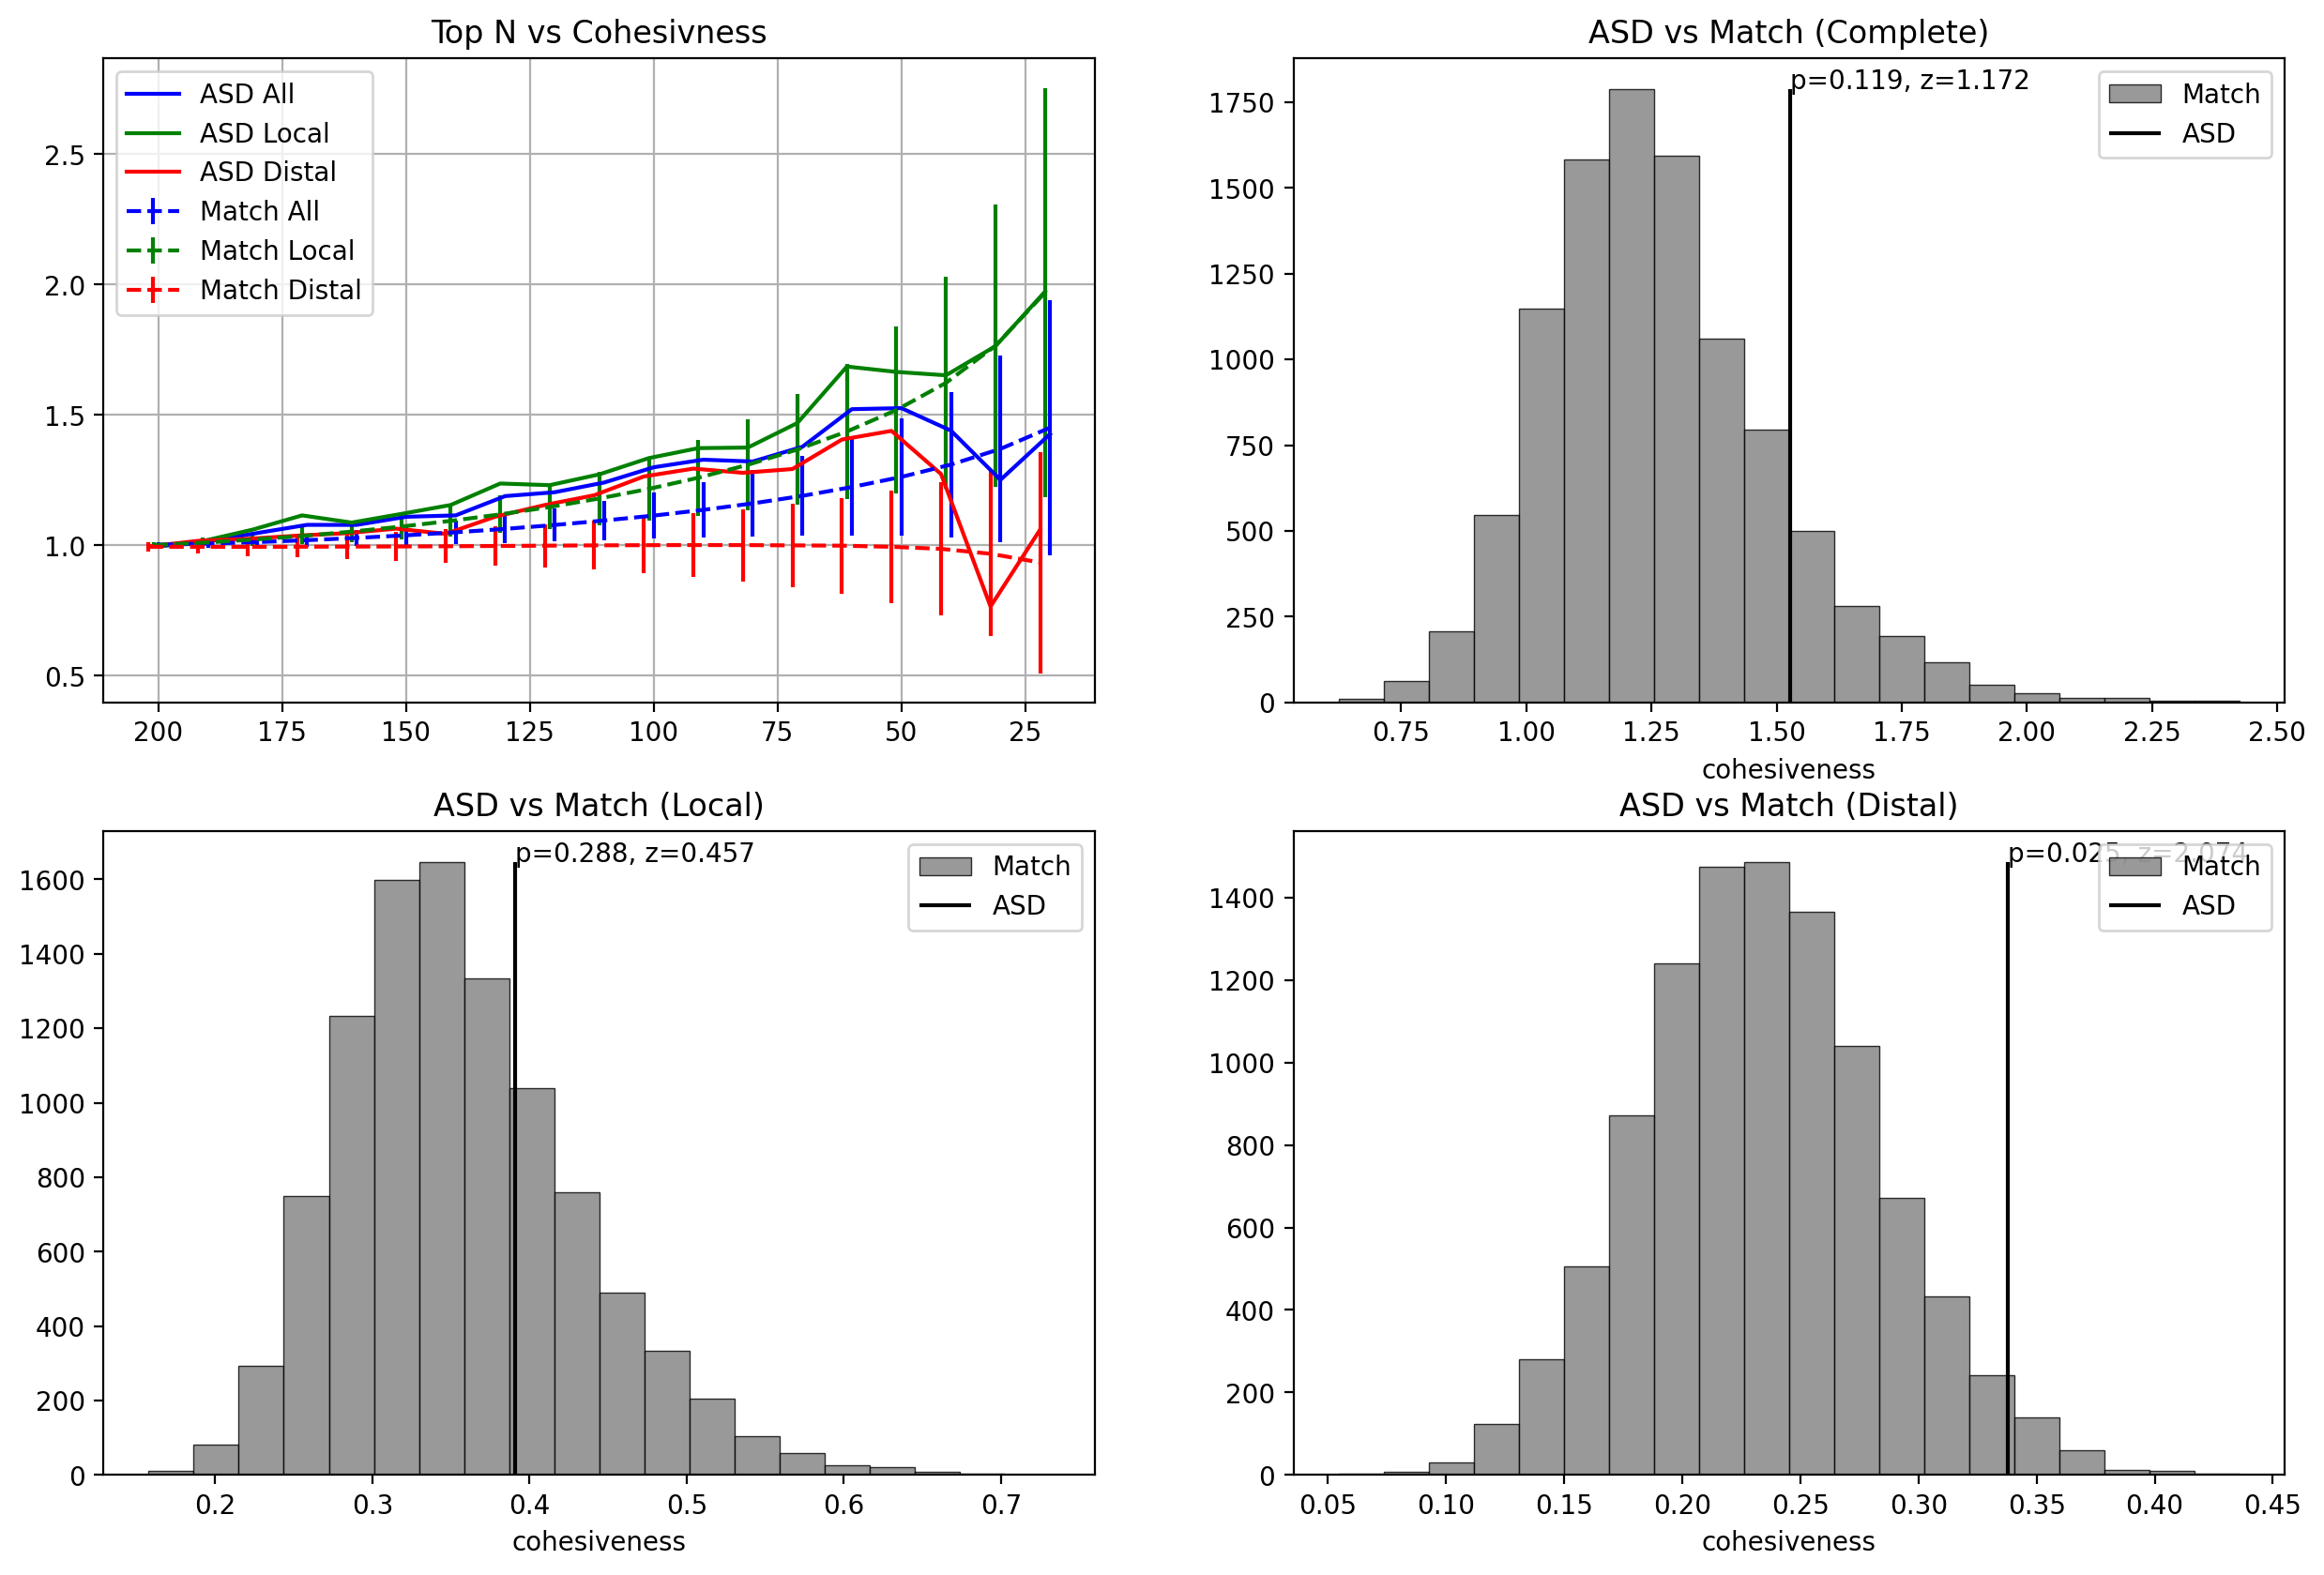

In [179]:
XXX(Cont2_Cohesivness, Cont2_Cohesivness_local, Cont2_Cohesivness_distal, "Match")

No handles with labels found to put in legend.


<AxesSubplot:>

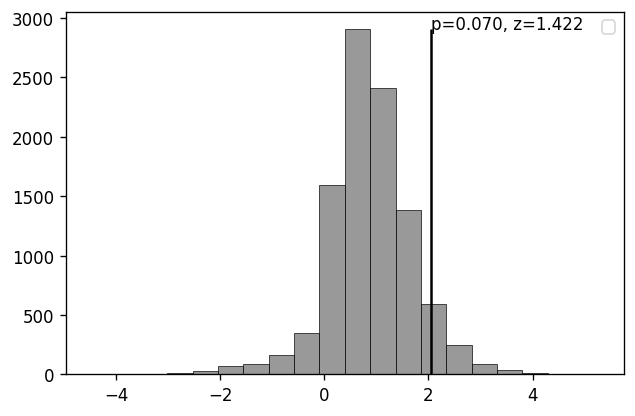

In [180]:
cohe_exp = np.array((np.array(topNs)/213))
Zscores = []
for i in range(Cont2_Cohesivness_distal.shape[0]):
    _Profile_i = Cont2_Cohesivness_distal[i, :]
    _peak_idx = np.argmax(_Profile_i/cohe_exp)
    #print(_Profile_i/cohe_exp)
    #print(_peak_idx)
    z, p = GetPermutationP(Cont2_Cohesivness_distal[:, _peak_idx], 
                           Cont2_Cohesivness_distal[i, _peak_idx])
    Zscores.append(z)
fig, ax = plt.subplots(dpi=120)
PlotPermutationP(Zscores, 2.048, ax)

In [130]:
topNs = np.arange(200, 10, -10)
print(topNs)
match_dir = "dat/Bootstrap_Match/asd.cont.bias.z2/"
Match_Cohesivness = []
Match_Cohesivness_local = []
Match_Cohesivness_distal = []
for i, file in enumerate(os.listdir(match_dir)):
    df = pd.read_csv(match_dir + file, index_col="STR")
    topN_cohe_all = []
    topN_cohe_local = []
    topN_cohe_distal = []
    for topN in topNs:
        top_strs = df.index.values[:topN]
        topN_cohe_all.append(ScoreSTRSet(graph, top_strs, {})[1])
        topN_cohe_local.append(ScoreSTRSet(graph_local, top_strs, {})[1])
        topN_cohe_distal.append(ScoreSTRSet(graph_distal, top_strs, {})[1])
    topN_cohe_all = np.array(topN_cohe_all)
    topN_cohe_local = np.array(topN_cohe_local)
    topN_cohe_distal = np.array(topN_cohe_distal)
    Match_Cohesivness.append(topN_cohe_all)
    Match_Cohesivness_local.append(topN_cohe_local)
    Match_Cohesivness_distal.append(topN_cohe_distal)
Match_Cohesivness = np.array(Match_Cohesivness)
Match_Cohesivness_local = np.array(Match_Cohesivness_local)
Match_Cohesivness_distal = np.array(Match_Cohesivness_distal)

[200 190 180 170 160 150 140 130 120 110 100  90  80  70  60  50  40  30
  20]


No handles with labels found to put in legend.


<AxesSubplot:>

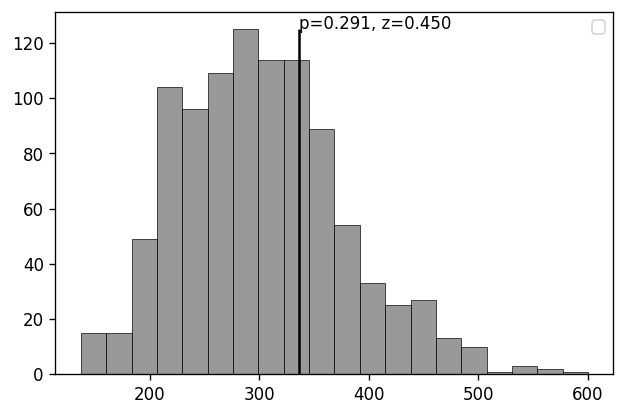

In [141]:
asd_topN_cohe_distal[-4]
(Match_Cohesivness_distal[:, -4])
fig, ax = plt.subplots(dpi=120)
#PlotPermutationP(Match_Cohesivness_distal[:, -4], asd_topN_cohe_distal[-4], ax)
#PlotPermutationP(Match_Cohesivness_local[:, -4], asd_topN_cohe_local[-4], ax)
PlotPermutationP(Match_Cohesivness[:, -4], asd_topN_cohe[-4], ax)


array([135,  87, 130,  75,  64, 174,  55,  71,  61,  52, 121, 110,  79,
       170,  72, 177, 125,  42,  95,  98, 113, 116, 148, 206, 103, 201,
       120, 132,  96,  86,  74, 103, 121,  74, 108,  88, 200, 104, 174,
       112, 126, 127, 114, 158, 131,  75,  54,  85, 119,  95,  78, 105,
        76, 124,  82, 122,  74, 133, 118, 151,  95, 155,  94,  74, 128,
       116, 120,  59,  77, 110, 119,  86,  30,  87, 119, 168, 115, 142,
       173,  52, 124, 168, 113,  73, 106,  95, 157, 116, 112,  90, 105,
        70, 140, 113,  71, 146, 150, 116, 130, 171, 123,  48, 232,  82,
       167, 103, 107,  84,  62, 109,  62, 100,  81, 132, 197, 165, 193,
        54, 147,  96,  86,  69, 213, 179,  90, 137,  94, 198,  99, 125,
        91,  83,  70, 100,  82, 114, 139, 127,  87, 137,  64, 106, 194,
        84,  92, 114,  70, 139, 193,  83, 194, 107, 104,  84,  71, 139,
        73, 118, 105,  87, 123, 169, 175, 113, 115, 159, 117,  67,  99,
       113,  83, 116, 136,  97, 100,  66, 200,  67,  72, 137,  9

In [32]:
topNs = np.arange(200, 10, -10)
print(topNs)
dnv_sim_dir = "dat/bias2/DNV_SM_Z2/"
dnv_sim_Cohesivness = []
dnv_sim_Cohesivness_local = []
dnv_sim_Cohesivness_distal = []
for i, file in enumerate(os.listdir(dnv_sim_dir)):
    df = pd.read_csv(dnv_sim_dir + file, index_col="STR")
    topN_cohe_all = []
    topN_cohe_local = []
    topN_cohe_distal = []
    for topN in topNs:
        top_strs = df.index.values[:topN]
        topN_cohe_all.append(ScoreSTRSet(graph, top_strs, {})[0])
        topN_cohe_local.append(ScoreSTRSet(graph_local, top_strs, {})[0])
        topN_cohe_distal.append(ScoreSTRSet(graph_distal, top_strs, {})[0])
    topN_cohe_all = np.array(topN_cohe_all)
    topN_cohe_local = np.array(topN_cohe_local)
    topN_cohe_distal = np.array(topN_cohe_distal)
    dnv_sim_Cohesivness.append(topN_cohe_all)
    dnv_sim_Cohesivness_local.append(topN_cohe_local)
    dnv_sim_Cohesivness_distal.append(topN_cohe_distal)
dnv_sim_Cohesivness = np.array(dnv_sim_Cohesivness)
dnv_sim_Cohesivness_local = np.array(dnv_sim_Cohesivness_local)
dnv_sim_Cohesivness_distal = np.array(dnv_sim_Cohesivness_distal)

[200 190 180 170 160 150 140 130 120 110 100  90  80  70  60  50  40  30
  20]


In [35]:
sub_sib_dir = "dat/Bootstrap_Match/subsampled_sibling/"
sub_sib_Cohesivness = []
sub_sib_Cohesivness_local = []
sub_sib_Cohesivness_distal = []
for i, file in enumerate(os.listdir(sub_sib_dir)):
    df = pd.read_csv(sub_sib_dir + file, index_col="STR")
    topN_cohe_all = []
    topN_cohe_local = []
    topN_cohe_distal = []
    for topN in topNs:
        top_strs = df.index.values[:topN]
        topN_cohe_all.append(ScoreSTRSet(graph, top_strs, {})[0])
        topN_cohe_local.append(ScoreSTRSet(graph_local, top_strs, {})[0])
        topN_cohe_distal.append(ScoreSTRSet(graph_distal, top_strs, {})[0])
    topN_cohe_all = np.array(topN_cohe_all)
    topN_cohe_local = np.array(topN_cohe_local)
    topN_cohe_distal = np.array(topN_cohe_distal)
    sub_sib_Cohesivness.append(topN_cohe_all)
    sub_sib_Cohesivness_local.append(topN_cohe_local)
    sub_sib_Cohesivness_distal.append(topN_cohe_distal)
sub_sib_Cohesivness = np.array(sub_sib_Cohesivness)
sub_sib_Cohesivness_local = np.array(sub_sib_Cohesivness_local)
sub_sib_Cohesivness_distal = np.array(sub_sib_Cohesivness_distal)

In [16]:
cohe_exp = np.array((np.array(topNs)/213))

In [131]:
def LoadBiasvsCoheFil(fil):
    fin = open(fil, 'rt')
    l1 = fin.readline().strip().split("\t")
    l2 = fin.readline().strip().split("\t")
    l2 = [int(x) for x in l2]
    l3 = fin.readline().strip().split("\t")
    l3 = [float(x) for x in l3]
    l4 = fin.readline().strip().split("\t")
    l4 = [float(x) for x in l4]
    return l1, l2, l3, l4

l1,l2,l3,l4 = LoadBiasvsCoheFil("dat/BiasRankCohe/ASD.EW.pLI.z2.rankcohe.txt")
asd_topN_cohe = []
asd_topN_cohe_local = []
asd_topN_cohe_distal = []
for topN in topNs:
    top_strs = l1[:topN]
    asd_topN_cohe.append(ScoreSTRSet(graph, top_strs, {})[1])
    asd_topN_cohe_local.append(ScoreSTRSet(graph_local, top_strs, {})[1])
    asd_topN_cohe_distal.append(ScoreSTRSet(graph_distal, top_strs, {})[1])

In [125]:
Name = "Match"
Profile, Profile_local, Profile_distal = Match_Cohesivness, Match_Cohesivness_local, Match_Cohesivness_distal
def XXX(Profile, Profile_local, Profile_distal, Name):
    profile_avg = Profile.mean(axis=0)
    profile_err = Profile.std(axis=0)
    profile_local_avg = Profile_local.mean(axis=0)
    profile_local_err = Profile_local.std(axis=0)
    profile_distal_avg = Profile_distal.mean(axis=0)
    profile_distal_err = Profile_distal.std(axis=0)

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10), dpi=200)
    ax1.plot(topNs, asd_topN_cohe/cohe_exp ,color="blue", label="ASD All")
    ax1.errorbar(topNs, profile_avg/cohe_exp, color="blue", yerr=profile_err/cohe_exp, ls="dashed", label="{} All".format(Name))

    ax1.plot(topNs+1, asd_topN_cohe_local/cohe_exp ,color="green", label="ASD Local")
    ax1.errorbar(topNs+1, profile_local_avg/cohe_exp, color="green", yerr=profile_local_err/cohe_exp, ls="dashed", label="{} Local".format(Name))

    ax1.plot(topNs+2, asd_topN_cohe_distal/cohe_exp ,color="red", label="ASD Distal")
    ax1.errorbar(topNs+2, profile_distal_avg/cohe_exp, color="red", yerr=profile_distal_err/cohe_exp, ls="dashed", label="{} Distal".format(Name))

    ax1.invert_xaxis()
    ax1.set_title("Top N vs Cohesivness")
    ax1.grid(True)
    ax1.legend()
    cohe_exp = 4118
    idx = -4
    PlotPermutationP(Profile[:, idx]/cohe_exp[idx],asd_topN_cohe[idx]/cohe_exp[idx], ax2,
                     title="ASD vs Match (Complete)", xlabel="cohesiveness", 
                     dist_label="Match", bar_label="ASD")
    PlotPermutationP(Profile_local[:, idx],asd_topN_cohe_local[idx], ax3, 
                     title="ASD vs Match (Local)", xlabel="cohesiveness", 
                     dist_label="Match", bar_label="ASD")
    PlotPermutationP(Profile_distal[:, idx],asd_topN_cohe_distal[idx], ax4,
                     title="ASD vs Match (Distal)", xlabel="cohesiveness", 
                     dist_label="Match", bar_label="ASD")

In [126]:
print(Match_Cohesivness[:, -4].mean(axis=0))
print(Match_Cohesivness[:, -4].std(axis=0))

0.3175291302594653
0.06404268867921276


In [142]:
0.1 ** 61

1.0000000000000033e-61

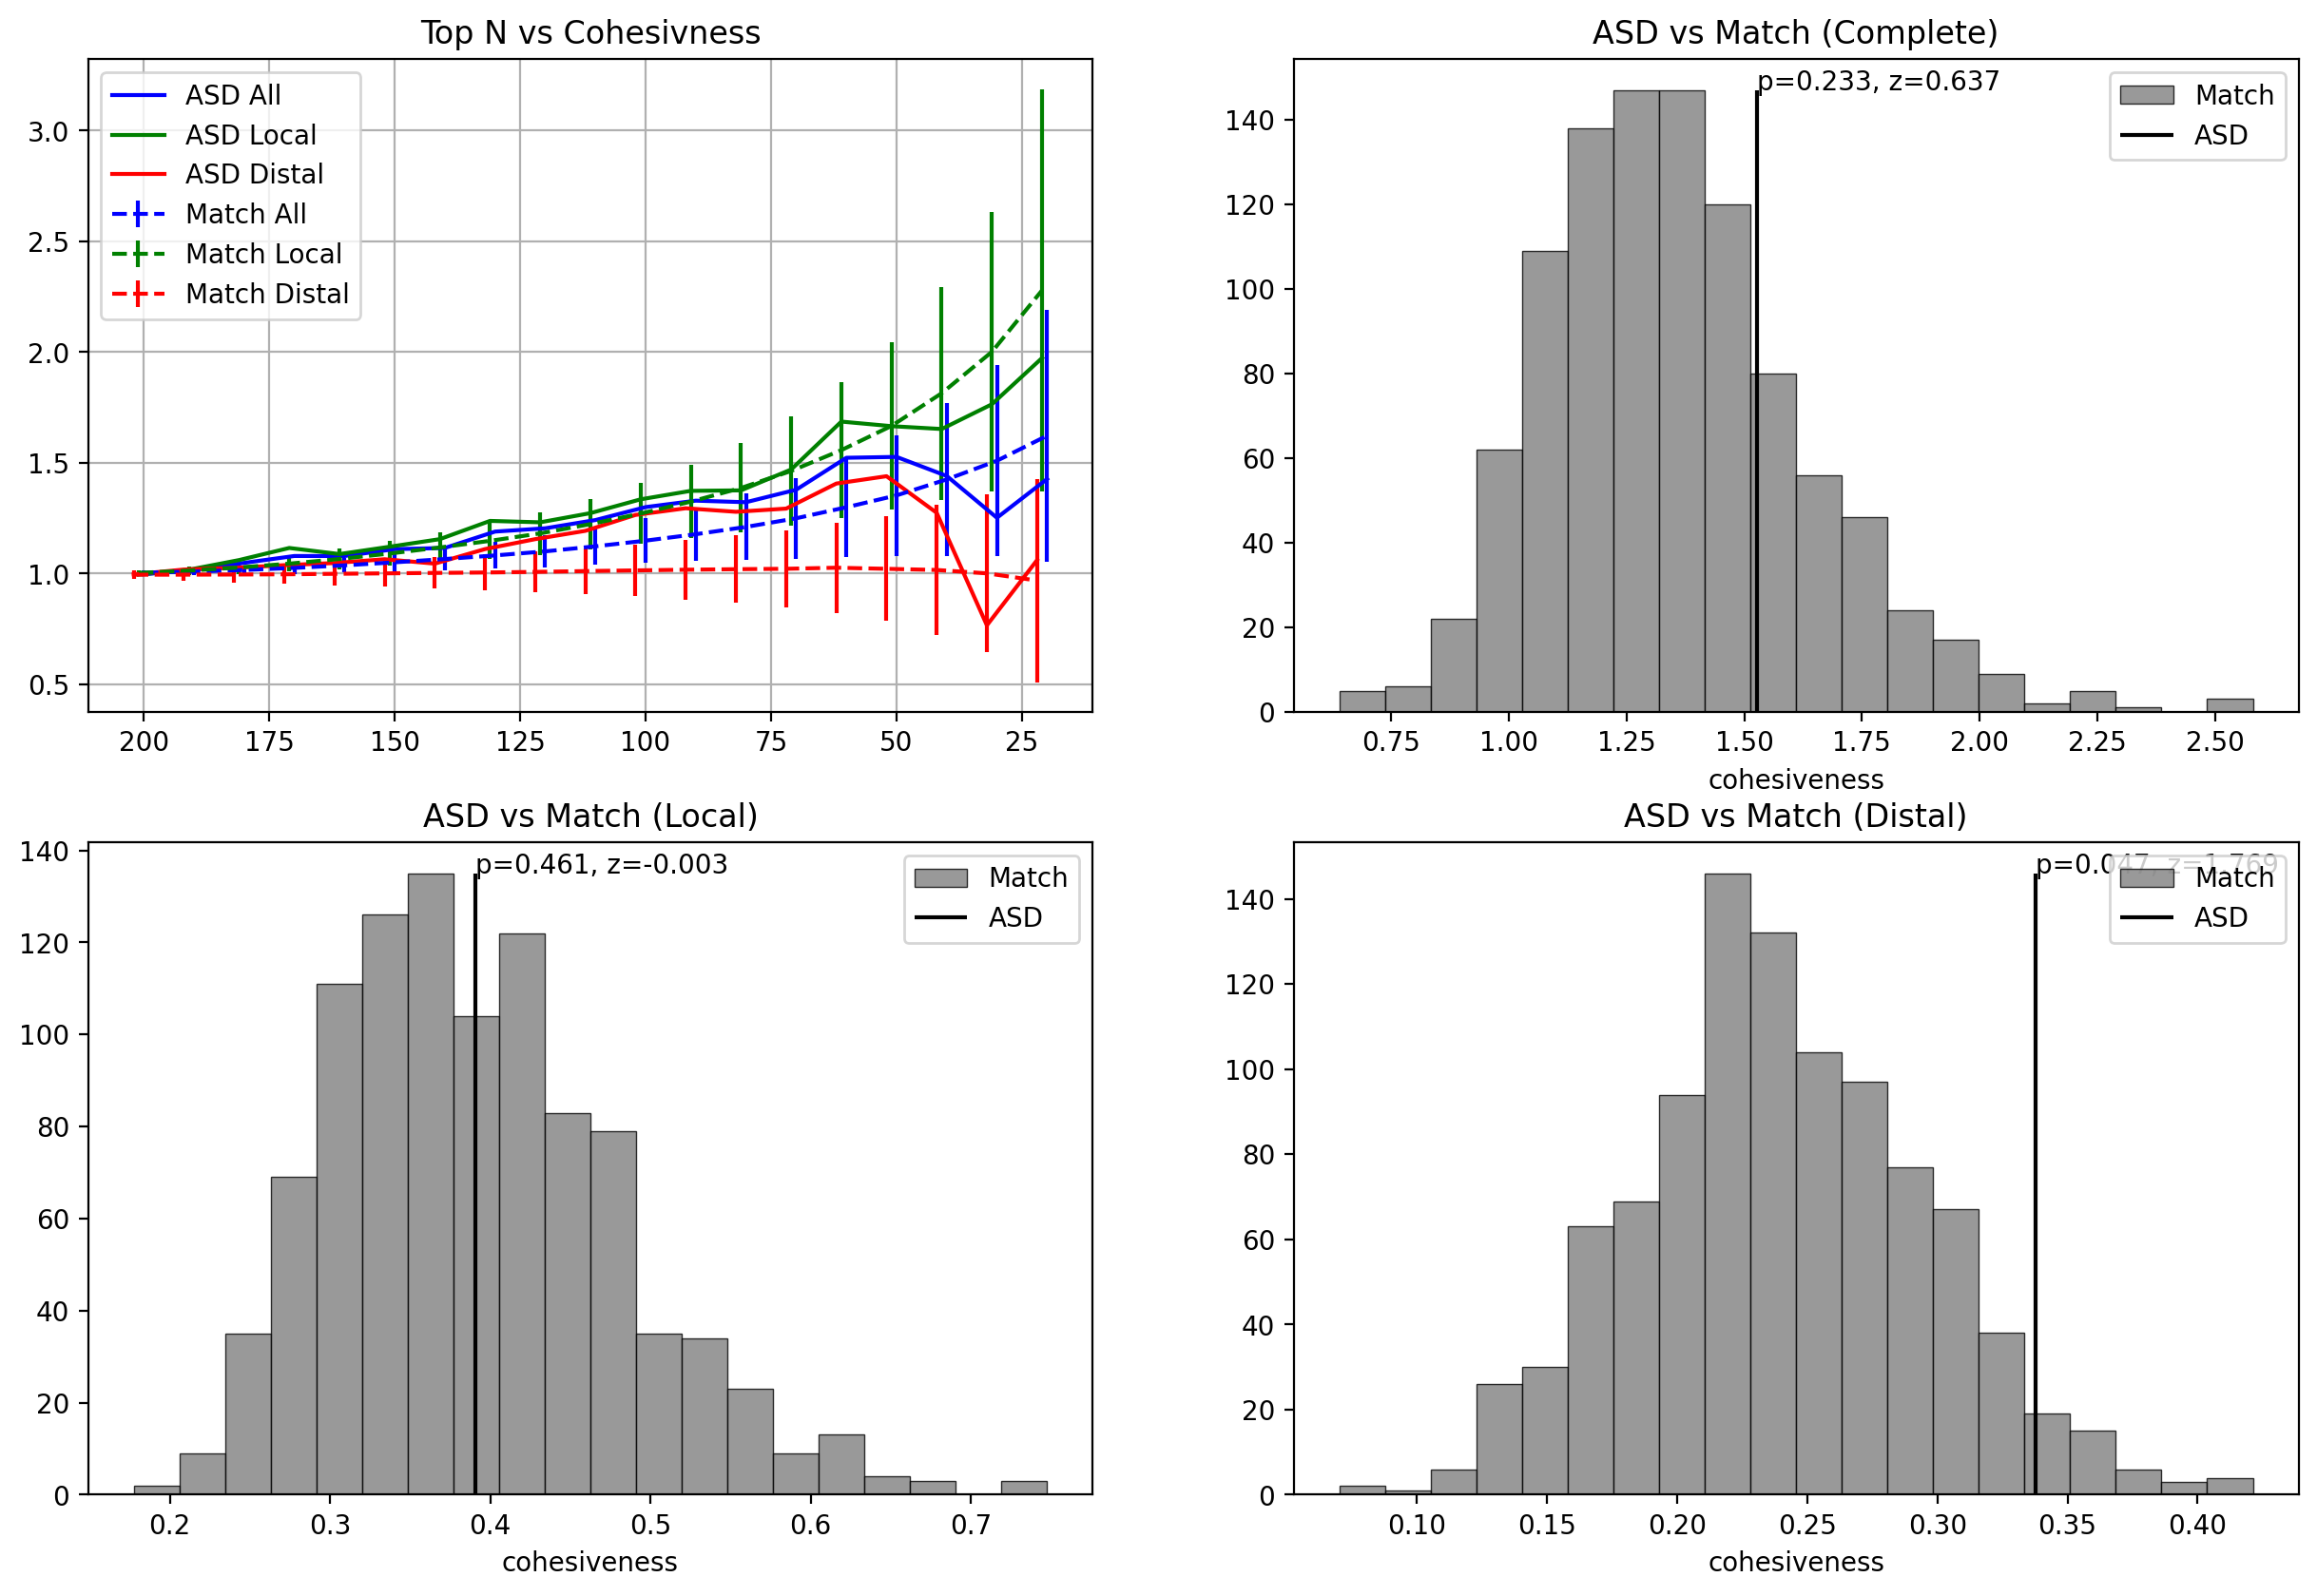

In [127]:
#Name = "Match"
#Profile, Profile_local, Profile_distal = Match_Cohesivness, Match_Cohesivness_local, Match_Cohesivness_distal
XXX(Match_Cohesivness, Match_Cohesivness_local, Match_Cohesivness_distal, "Match")


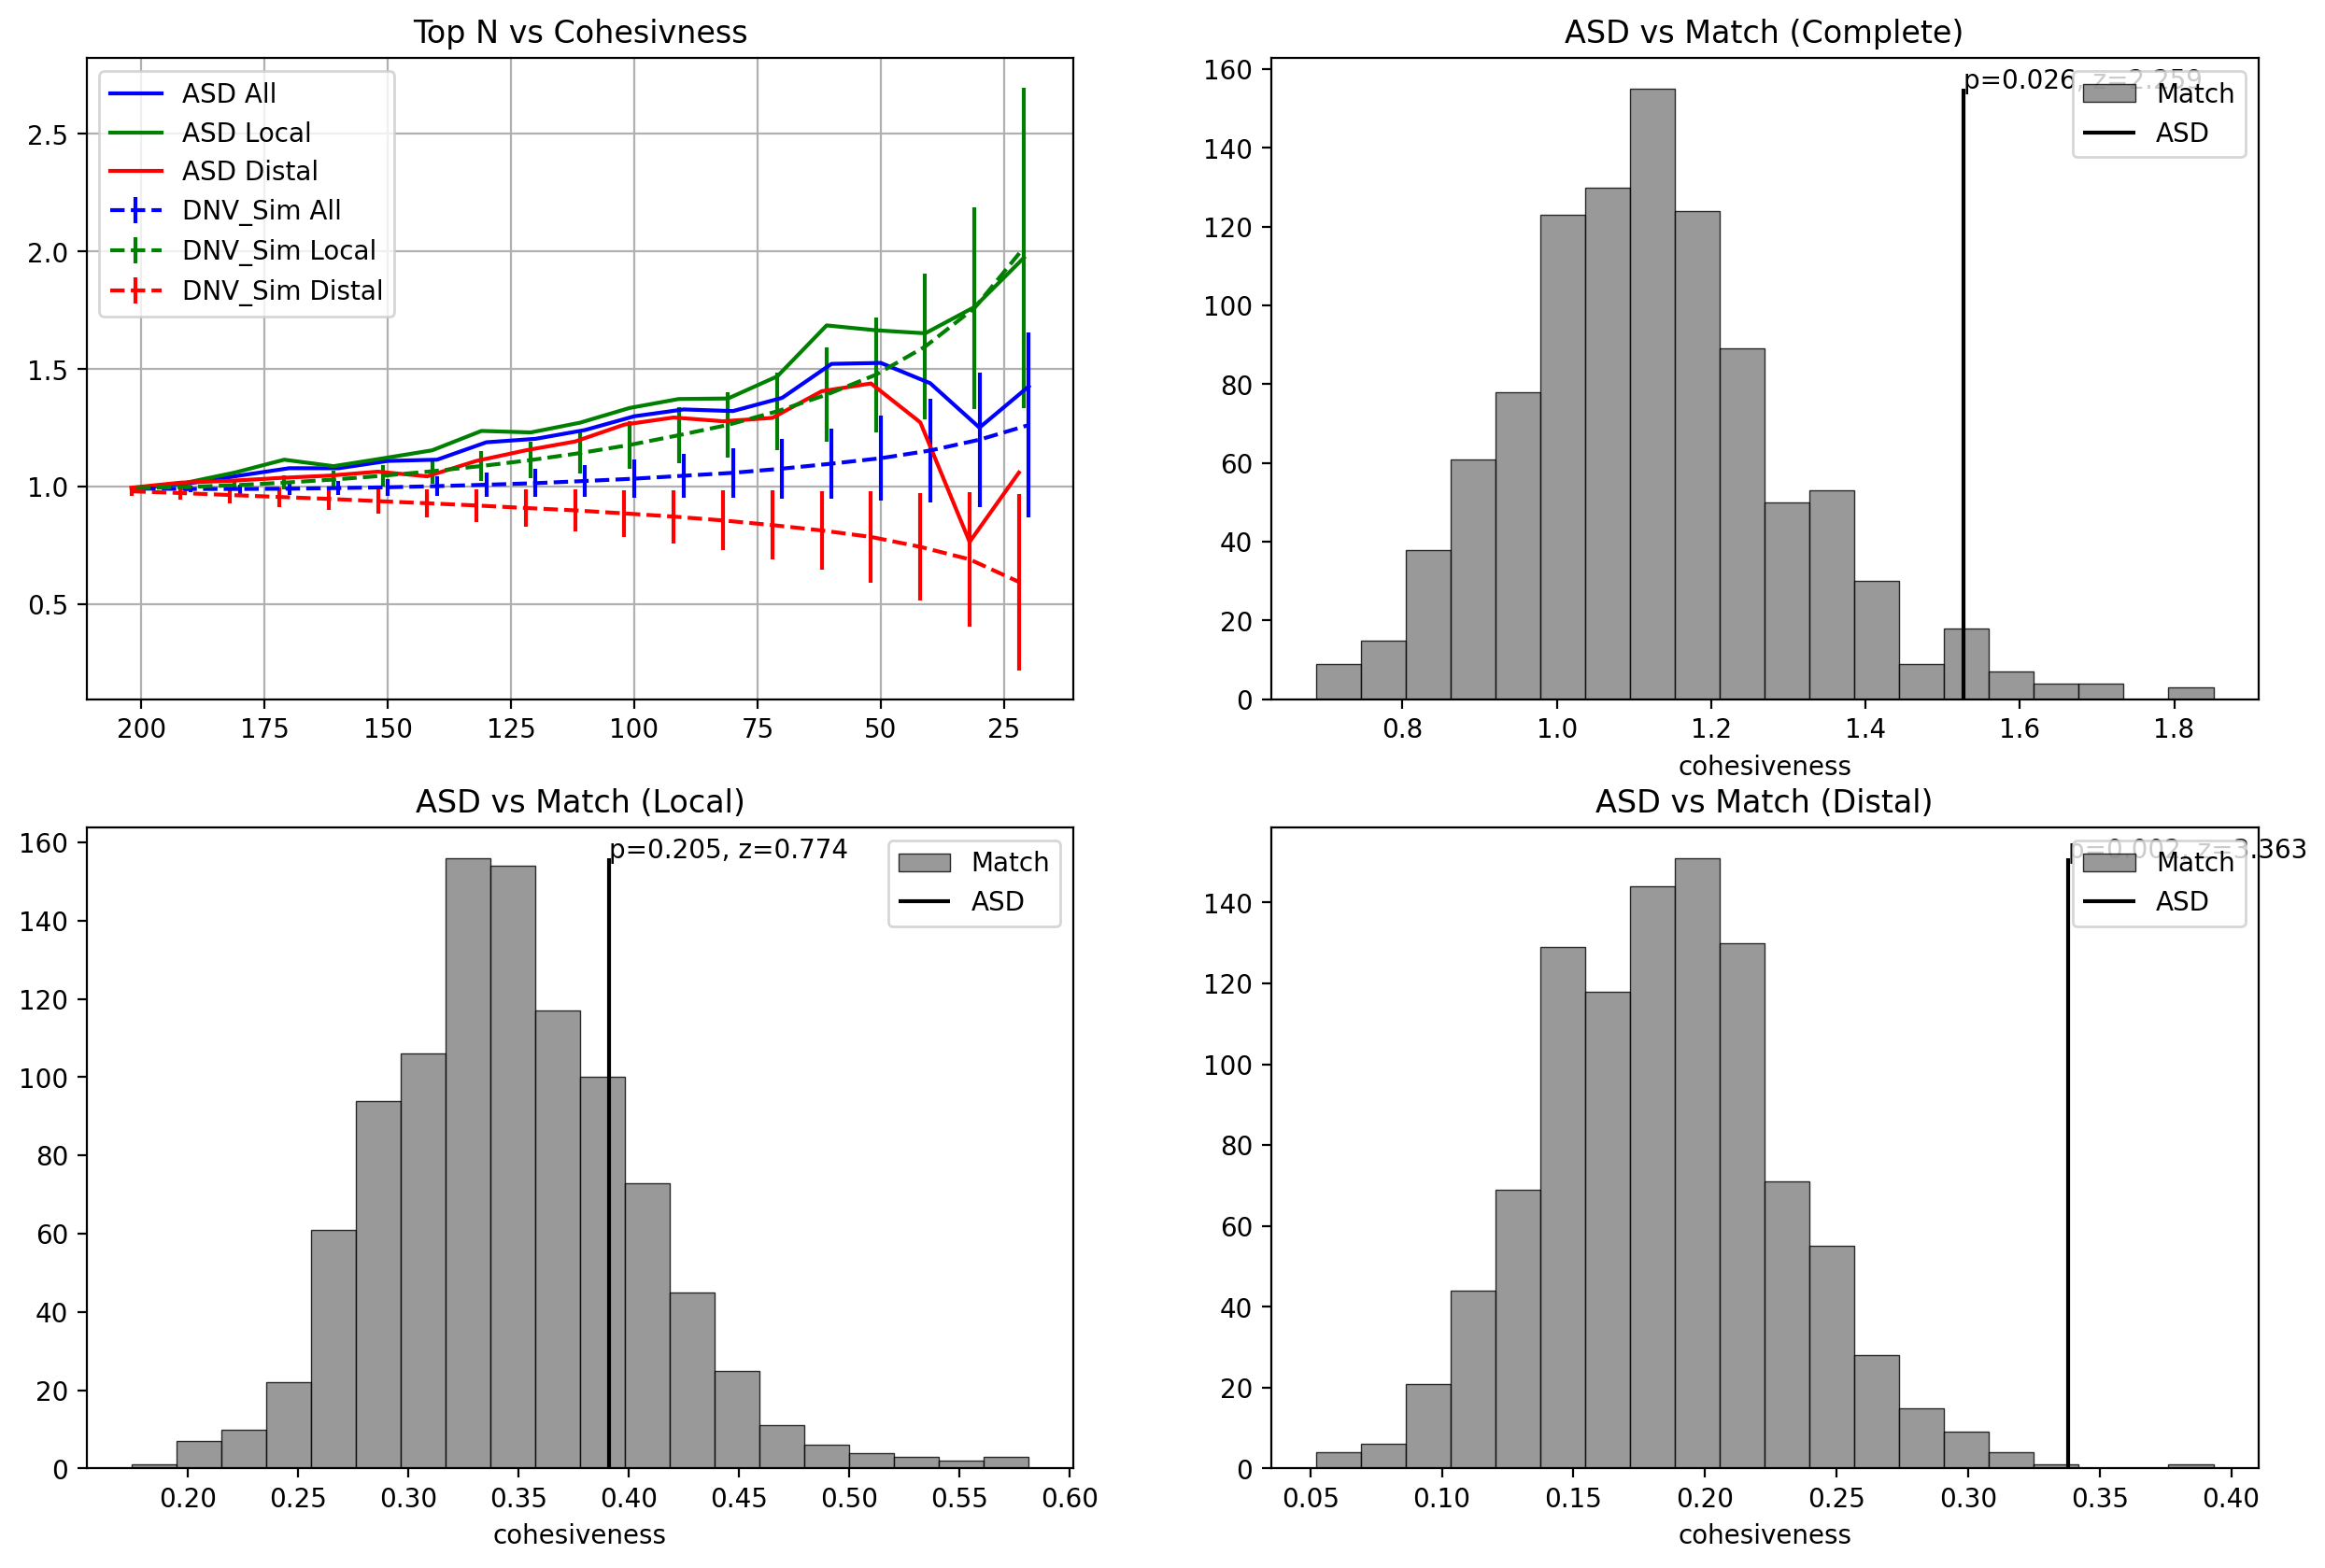

In [128]:
XXX(dnv_sim_Cohesivness, dnv_sim_Cohesivness_local, dnv_sim_Cohesivness_distal, "DNV_Sim")

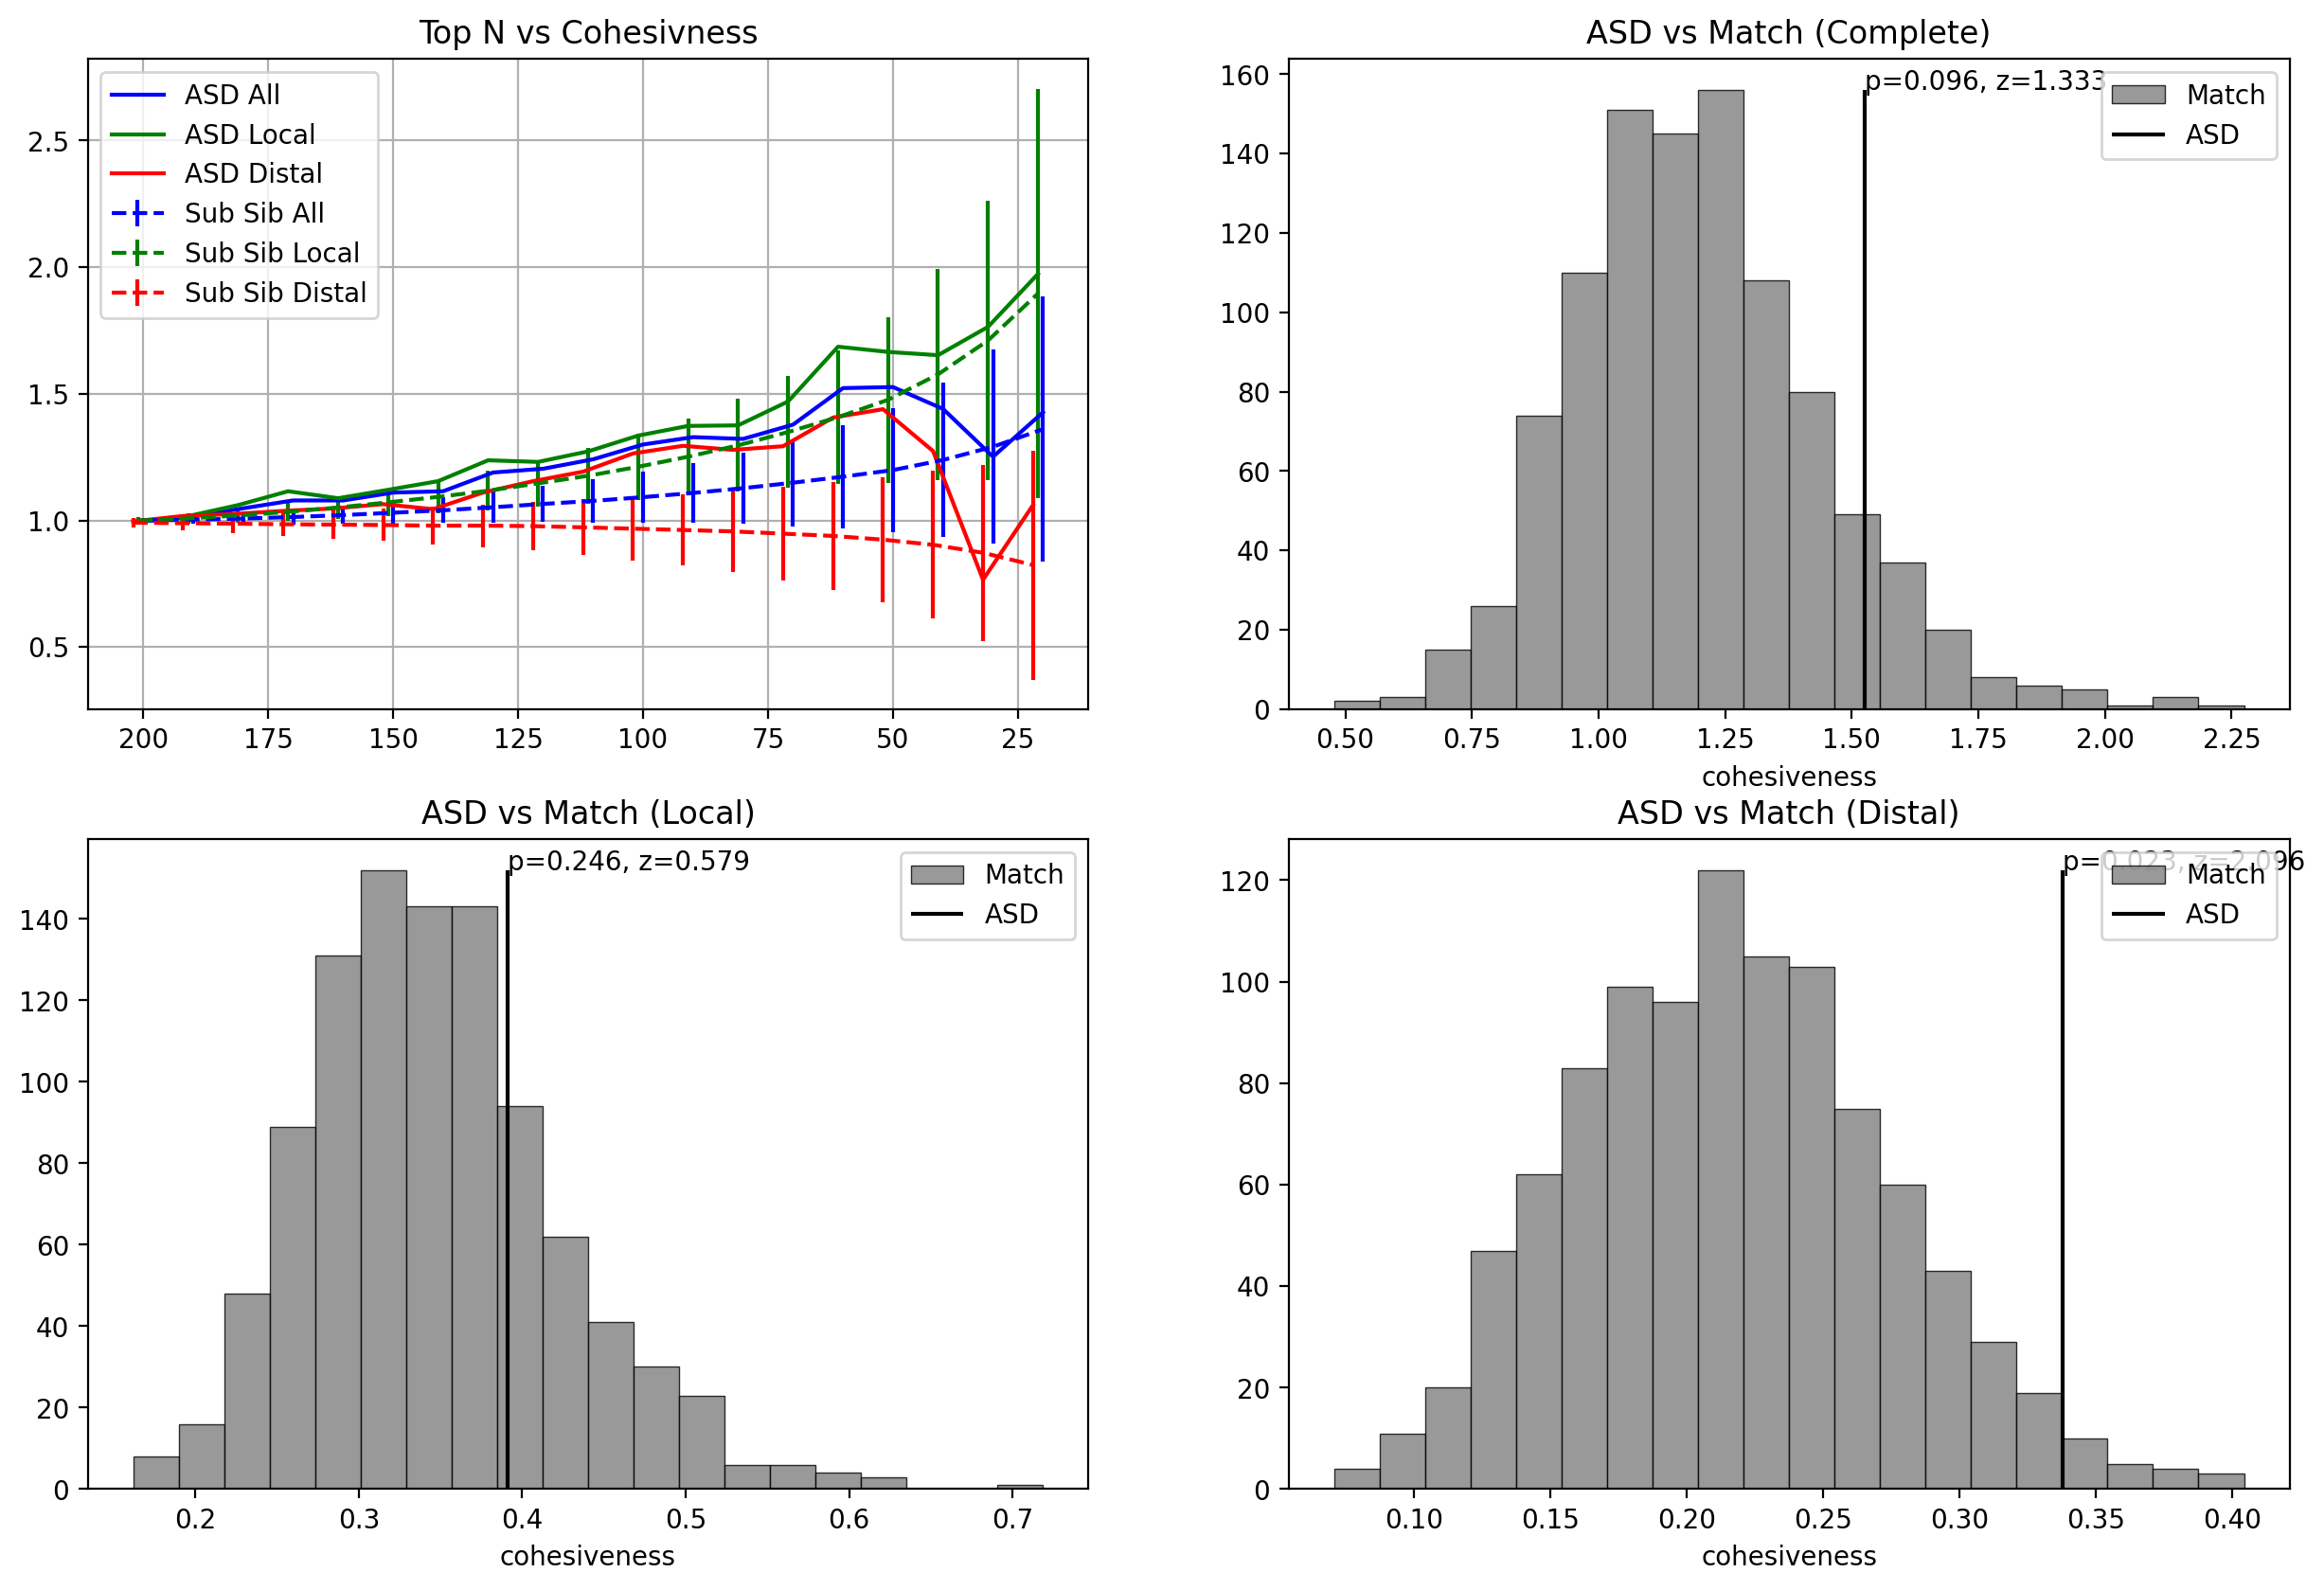

In [129]:
XXX(sub_sib_Cohesivness, sub_sib_Cohesivness_local, sub_sib_Cohesivness_distal, "Sub Sib")

In [93]:
idx = -4
#print(topNs[idx])
#PlotPermutationP(sub_sib_Cohesivness[:, idx],asd_topN_cohe[idx])
#PlotPermutationP(sub_sib_Cohesivness_local[:, idx],asd_topN_cohe_local[idx])
#PlotPermutationP(sub_sib_Cohesivness_distal[:, idx],asd_topN_cohe_distal[idx])

In [87]:
pp1, pp2, pp3 = [], [], []
zz1, zz2, zz3 = [], [], []
for idx, n in enumerate(topNs):
    z1, p1 = GetPermutationP(Match_Cohesivness[:, idx],asd_topN_cohe[idx])
    z2, p2 = GetPermutationP(Match_Cohesivness_local[:, idx],asd_topN_cohe_local[idx])
    z3, p3 = GetPermutationP(Match_Cohesivness_distal[:, idx],asd_topN_cohe_distal[idx])
    pp1.append(p1)
    pp2.append(p2)
    pp3.append(p3)
    zz1.append(z1)
    zz2.append(z2)
    zz3.append(z3)

In [95]:
print(pp3[-4])

0.04700000000000004


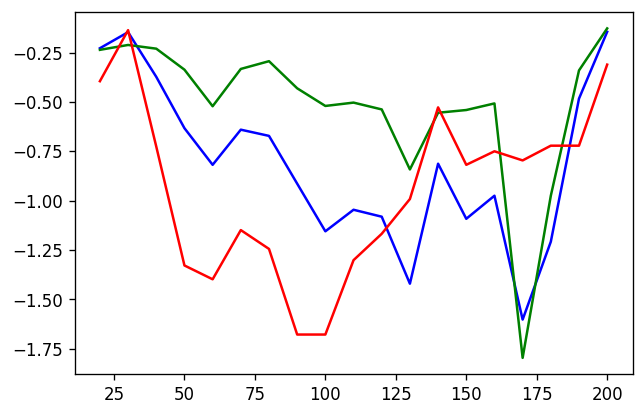

In [92]:
fig, ax = plt.subplots(dpi=120)
ax.plot(topNs, np.log10(pp1), color="blue")
ax.plot(topNs, np.log10(pp2), color="green")
ax.plot(topNs, np.log10(pp3), color="red")
#ax.set_yscale('log')

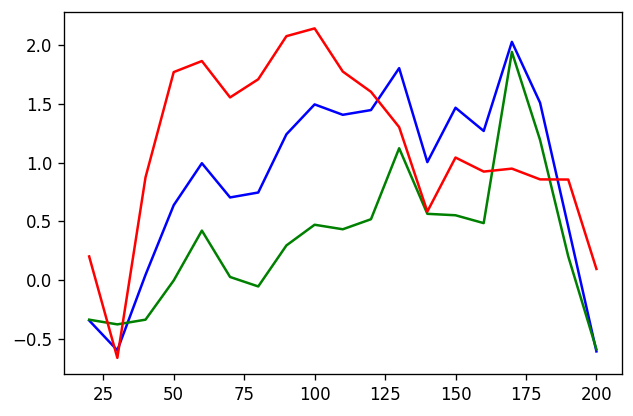

In [94]:
fig, ax = plt.subplots(dpi=120)
ax.plot(topNs, zz1, color="blue")
ax.plot(topNs, zz2, color="green")
ax.plot(topNs, zz3, color="red")
#ax.set_yscale('log')

In [96]:
pp1, pp2, pp3 = [], [], []
zz1, zz2, zz3 = [], [], []
for idx, n in enumerate(topNs):
    z1, p1 = GetPermutationP(dnv_sim_Cohesivness[:, idx],asd_topN_cohe[idx])
    z2, p2 = GetPermutationP(dnv_sim_Cohesivness_local[:, idx],asd_topN_cohe_local[idx])
    z3, p3 = GetPermutationP(dnv_sim_Cohesivness_distal[:, idx],asd_topN_cohe_distal[idx])
    pp1.append(p1)
    pp2.append(p2)
    pp3.append(p3)
    zz1.append(z1)
    zz2.append(z2)
    zz3.append(z3)

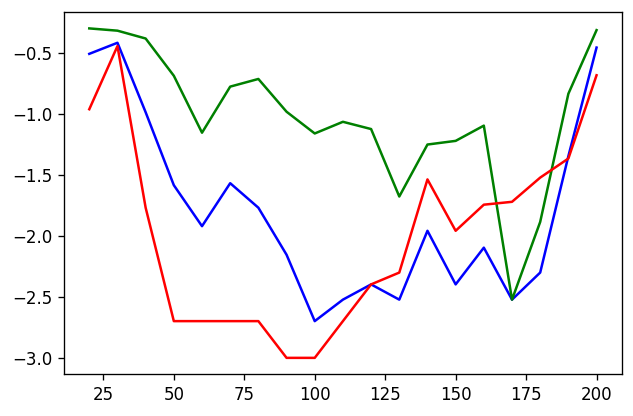

In [97]:
fig, ax = plt.subplots(dpi=120)
ax.plot(topNs, np.log10(pp1), color="blue")
ax.plot(topNs, np.log10(pp2), color="green")
ax.plot(topNs, np.log10(pp3), color="red")
#ax.set_yscale('log')

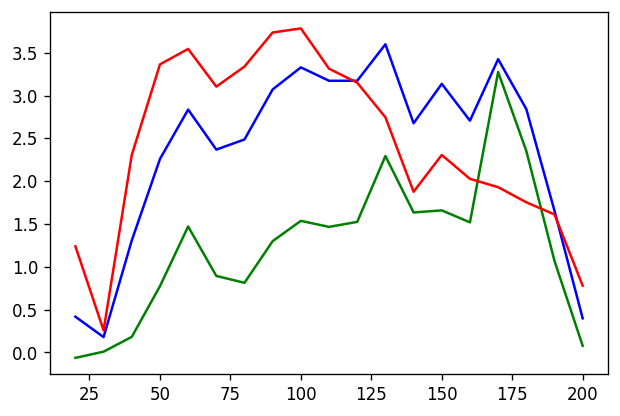

In [98]:
fig, ax = plt.subplots(dpi=120)
ax.plot(topNs, zz1, color="blue")
ax.plot(topNs, zz2, color="green")
ax.plot(topNs, zz3, color="red")